<a href="https://colab.research.google.com/github/tusarimran3/data-analysis-with-python/blob/main/dengueedgeproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

from google.colab import drive
drive.mount('/content/drive')




Mounted at /content/drive


In [2]:
import pandas as pd


df = pd.read_csv('/content/drive/MyDrive/Project/Dengue diseases dataset.csv')

print("Data loaded successfully! Shape:", df.shape)


Data loaded successfully! Shape: (1003, 9)


In [3]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1003 non-null   int64  
 1   Sex                 1003 non-null   object 
 2   Haemoglobin         1003 non-null   float64
 3   WBC Count           979 non-null    float64
 4   Differential Count  1003 non-null   int64  
 5   RBC PANEL           1003 non-null   int64  
 6   Platelet Count      986 non-null    float64
 7   PDW                 984 non-null    float64
 8   Final Output        989 non-null    float64
dtypes: float64(5), int64(3), object(1)
memory usage: 70.7+ KB


In [4]:

# Set target column here
TARGET = "Final Output"

Missing values:
 Age                    0
Sex                    0
Haemoglobin            0
WBC Count             24
Differential Count     0
RBC PANEL              0
Platelet Count        17
PDW                   19
Final Output          14
dtype: int64


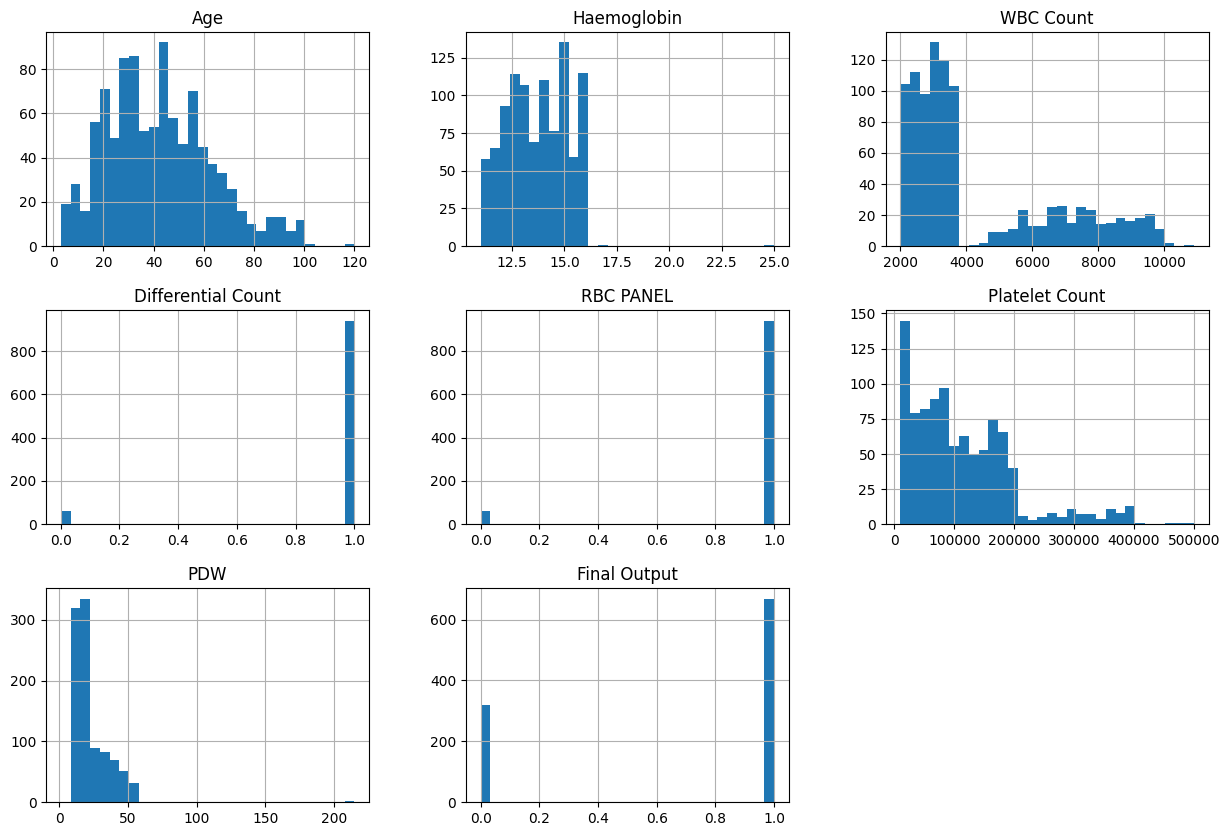

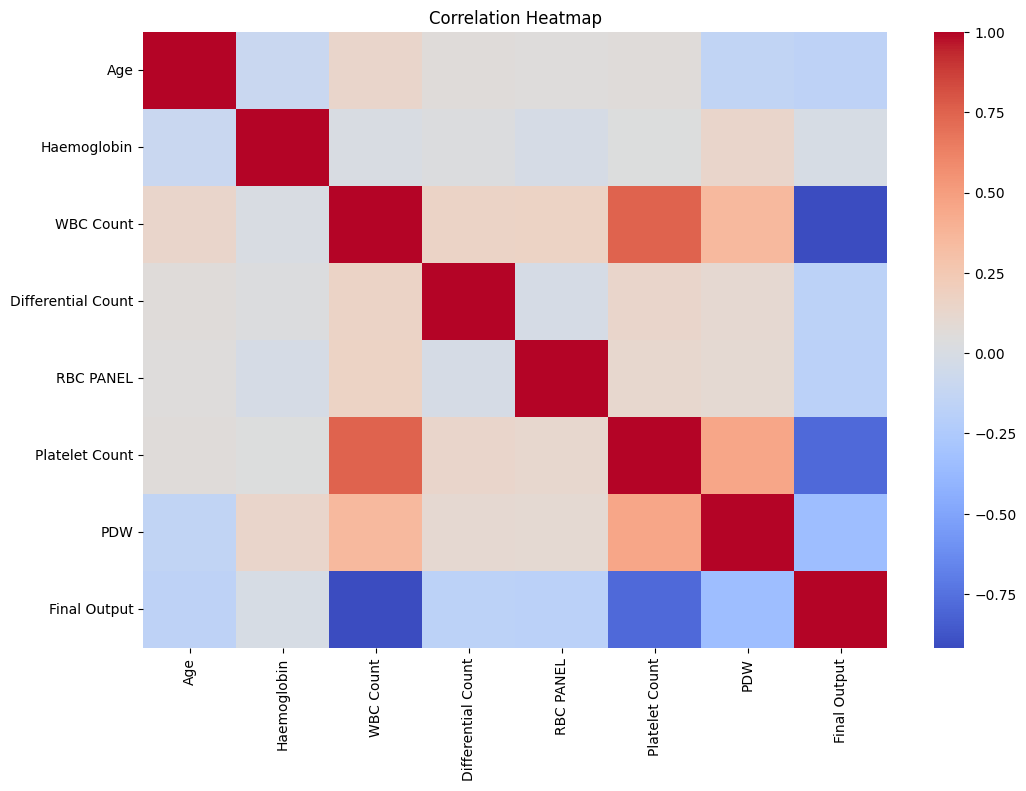

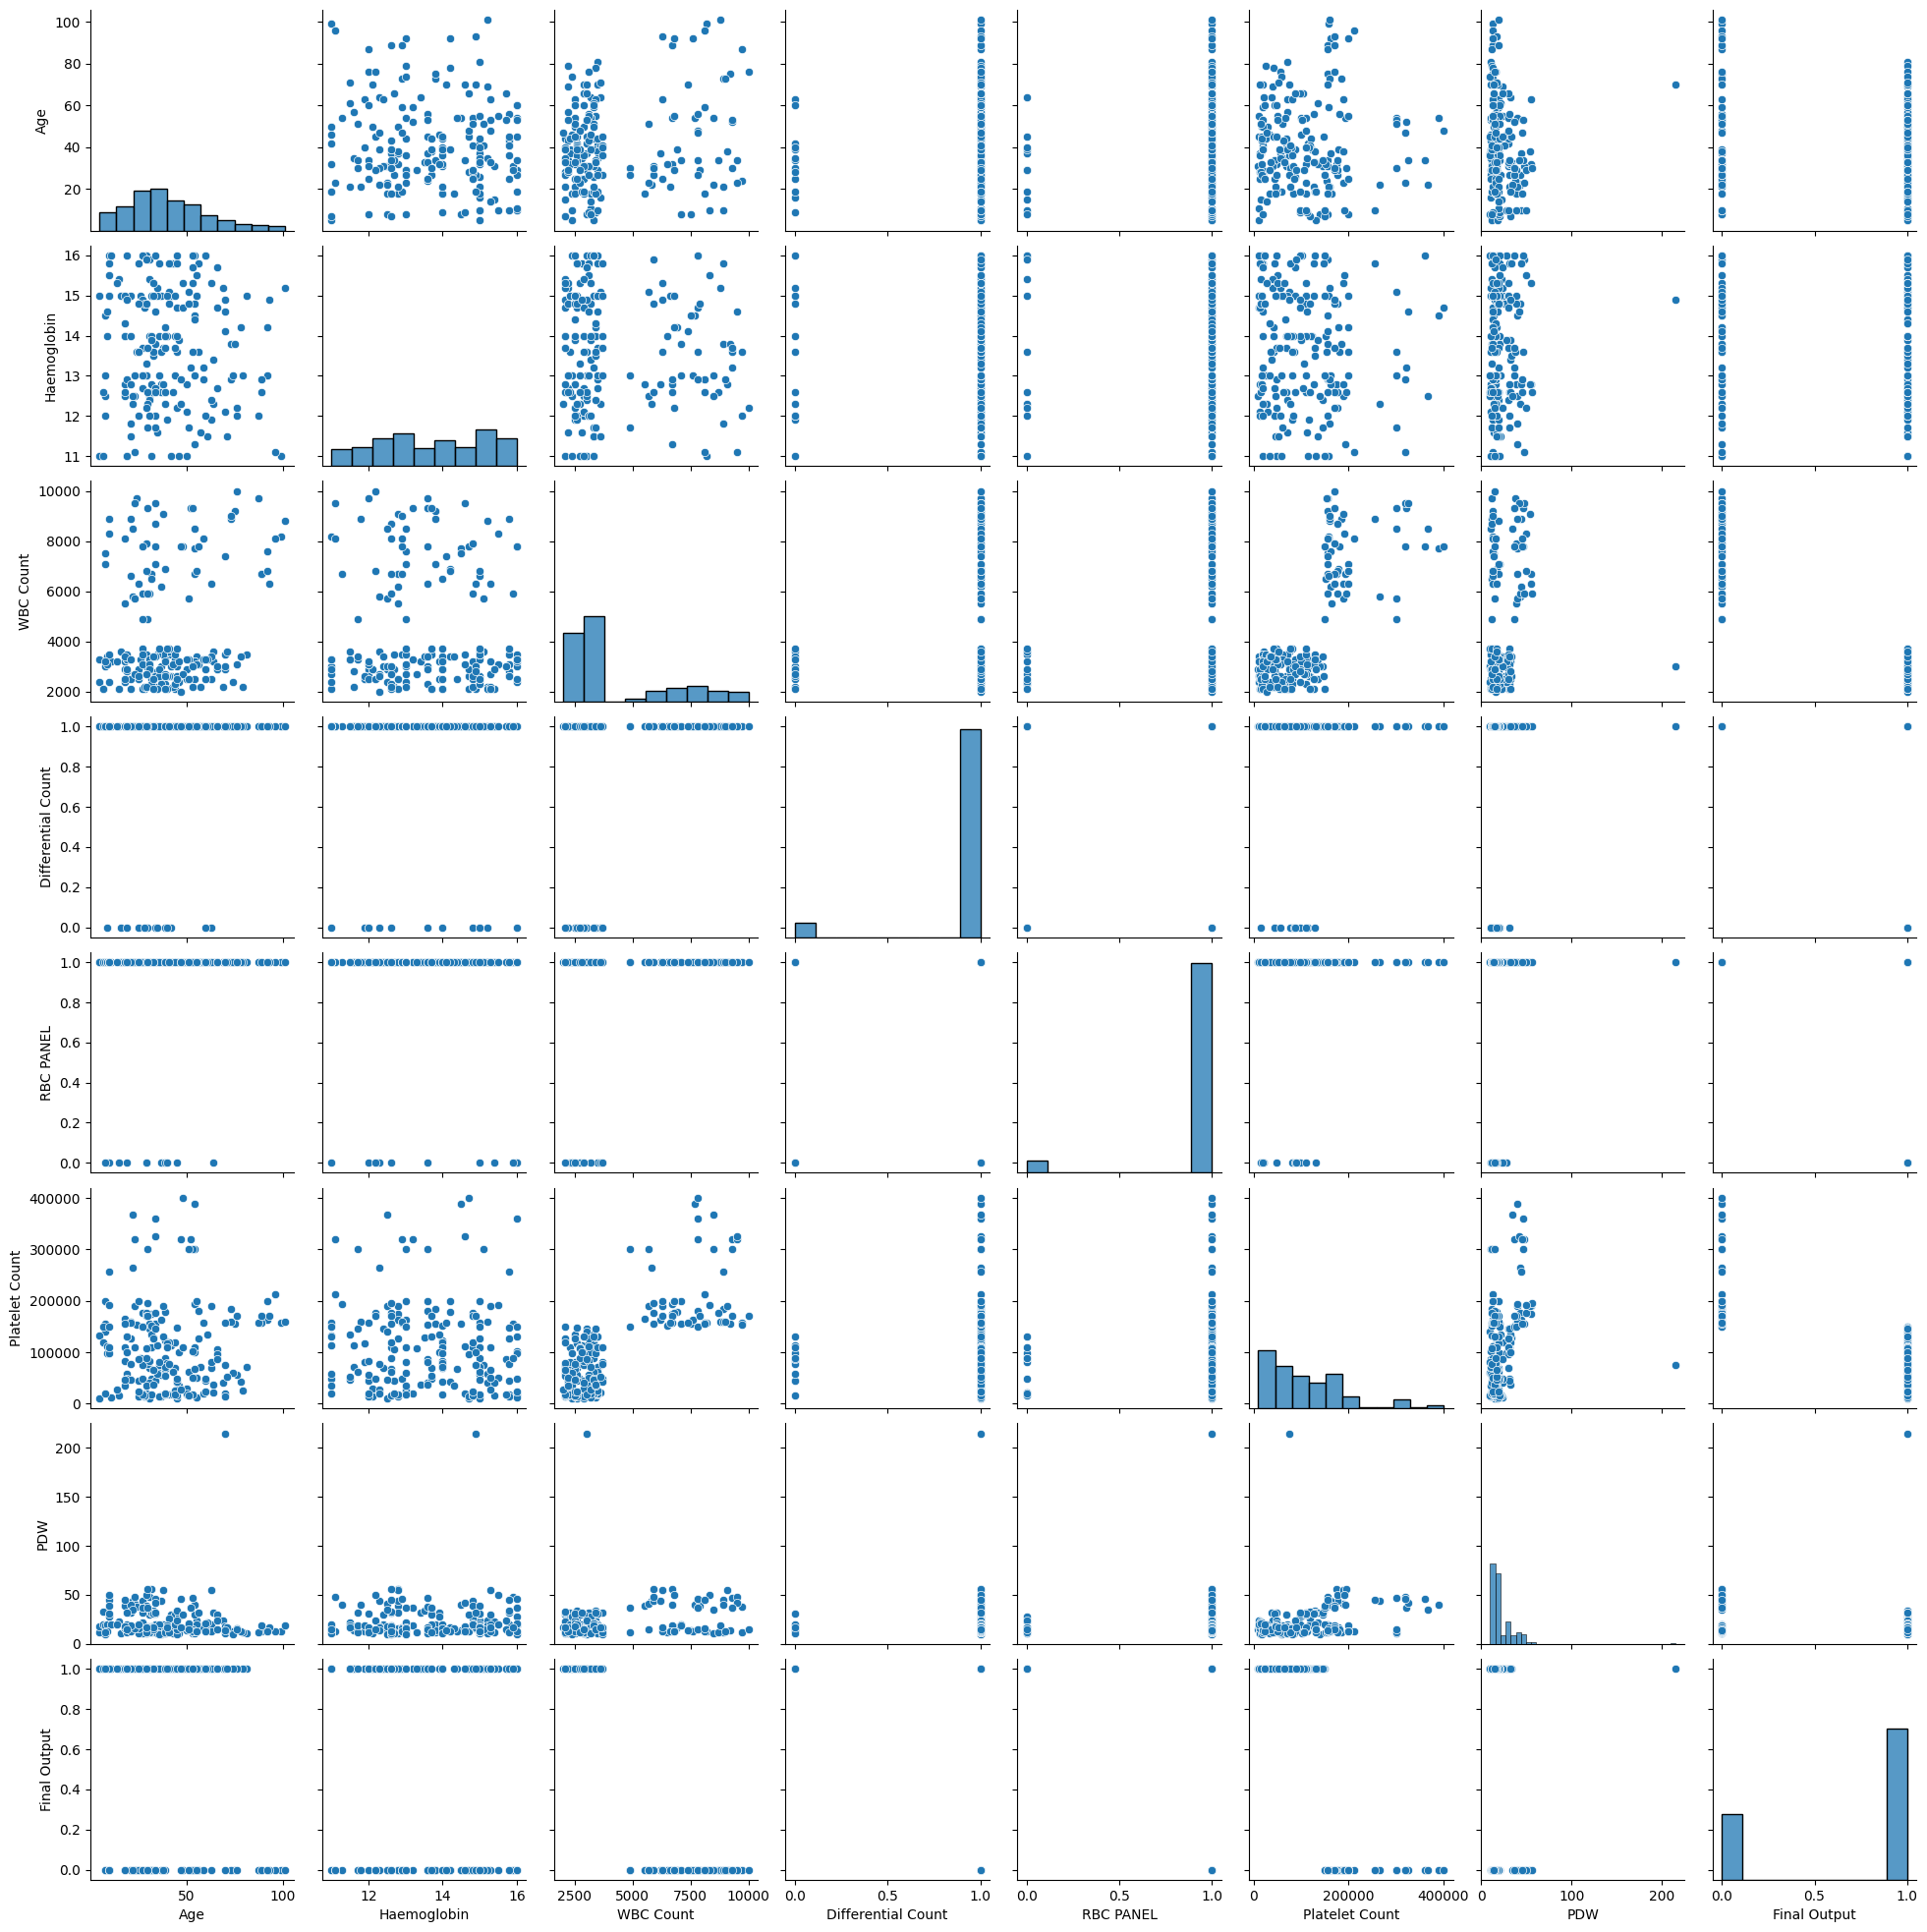

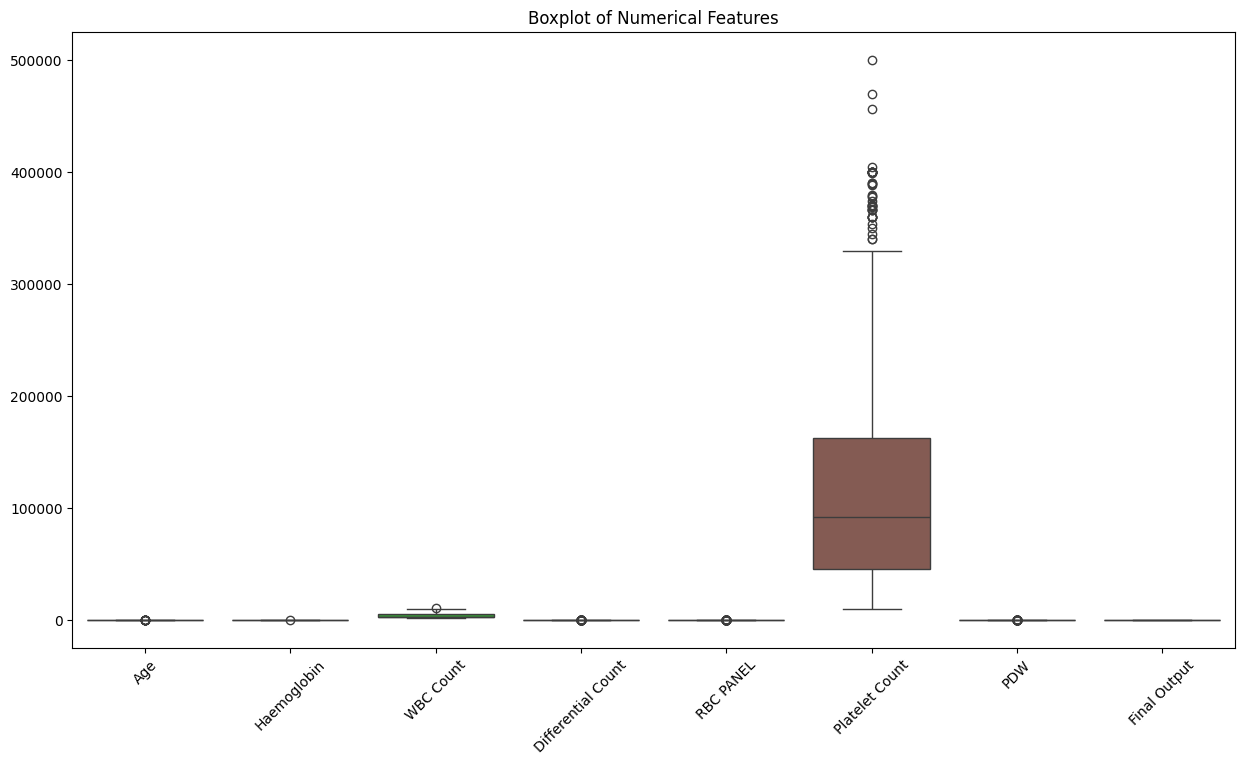

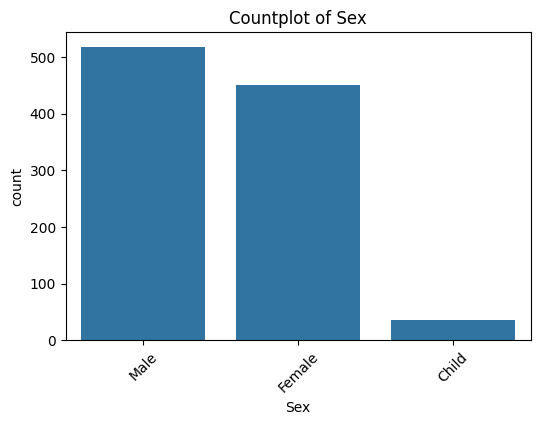

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check missing values
print("Missing values:\n", df.isnull().sum())

# Histograms & KDE
df.hist(figsize=(15,10), bins=30)
plt.show()

# Correlation heatmap (numeric only)
plt.figure(figsize=(12,8))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Pairplot (small datasets only)
try:
    sns.pairplot(df.sample(min(200, len(df))))
    plt.show()
except:
    print("Pairplot skipped due to dataset size.")

# Boxplots for outlier detection (numeric only)
num_cols = df.select_dtypes(include='number').columns
plt.figure(figsize=(15,8))
sns.boxplot(data=df[num_cols])
plt.title("Boxplot of Numerical Features")
plt.xticks(rotation=45)
plt.show()

# Countplots for categorical columns
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col)
    plt.title(f"Countplot of {col}")
    plt.xticks(rotation=45)
    plt.show()


In [7]:
# importing necessary libraries

import pandas as pd
import collections # for creating and manipulating Python's collections like OrderedDict, defaultdict, Counter, etc.
import numpy as np # for scientific computing with Python
import matplotlib.pyplot as plt # for data visualization
%matplotlib inline
import seaborn as sns # for advanced visualization

# Classifier Libraries
from sklearn.linear_model import LogisticRegression # for implementing logistic regression algorithm
from sklearn.tree import DecisionTreeClassifier # for implementing decision tree algorithm
from sklearn.ensemble import RandomForestClassifier # for implementing random forest algorithm
from sklearn.svm import SVC # for implementing Support Vector Machine (SVM) algorithm
from sklearn.naive_bayes import GaussianNB # for implementing Naive Bayes algorithm
from sklearn.neighbors import KNeighborsClassifier # for implementing K-Nearest Neighbors (KNN)  algorithm


# For Statistical testing
from scipy.stats import ttest_ind # for computing t-test for two independent samples
import statsmodels.api as sm # for statistical models and tests
from scipy.stats import chi2_contingency # for computing chi-square statistic and p-value for a contingency table
import scipy.stats as stats # for implementing skewness and other stats


# Other Libraries
from sklearn.model_selection import train_test_split # for splitting data into training and testing sets
from sklearn.pipeline import make_pipeline # for building a pipeline of transforms with a final estimator
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline # for building a pipeline with imbalanced datasets
from imblearn.over_sampling import SMOTE # for oversampling imbalanced datasets using Synthetic Minority Over-sampling Technique (SMOTE)
from imblearn.under_sampling import NearMiss # for undersampling imbalanced datasets using NearMiss algorithm
from imblearn.metrics import classification_report_imbalanced # for generating a classification report for imbalanced datasets
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report # for computing various performance metrics for classification models
from collections import Counter # for counting the frequency of elements in a list
from sklearn.model_selection import KFold, StratifiedKFold # for k-fold cross-validation
from sklearn.model_selection import cross_val_score # for evaluating a model using cross-validation
from sklearn.metrics import cohen_kappa_score # for computing Cohen's kappa score for inter-rater agreement
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 5000) # for setting the maximum number of columns to display in pandas dataframes



In [8]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.2 MB/s eta 0:00:00


In [9]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LassoCV, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier, ExtraTreesClassifier
from scipy.stats import ttest_ind, zscore
import numpy as np
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTEENN, SMOTETomek
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, roc_auc_score, r2_score, mean_absolute_error
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.calibration import calibration_curve
import warnings
warnings.filterwarnings('ignore')

In [10]:
df.isnull().sum()



,0
Age,0
Sex,0
Haemoglobin,0
WBC Count,24
Differential Count,0
RBC PANEL,0
Platelet Count,17
PDW,19
Final Output,14


In [11]:
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    df[column].fillna(df[column].mean(), inplace=True)

In [12]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1003 non-null   int64  
 1   Sex                 1003 non-null   object 
 2   Haemoglobin         1003 non-null   float64
 3   WBC Count           1003 non-null   float64
 4   Differential Count  1003 non-null   int64  
 5   RBC PANEL           1003 non-null   int64  
 6   Platelet Count      1003 non-null   float64
 7   PDW                 1003 non-null   float64
 8   Final Output        1003 non-null   float64
dtypes: float64(5), int64(3), object(1)
memory usage: 70.7+ KB


In [13]:

float_cols = df.select_dtypes(include='float').columns
df[float_cols] = df[float_cols].round().astype('Int64')

print(df.dtypes)


Age                    int64
Sex                   object
Haemoglobin            Int64
WBC Count              Int64
Differential Count     int64
RBC PANEL              int64
Platelet Count         Int64
PDW                    Int64
Final Output           Int64
dtype: object


In [14]:
# Step 3: Data Preprocessing
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])

In [ ]:
df.head()

,Age,Sex,Haemoglobin,WBC Count,Differential Count,RBC PANEL,Platelet Count,PDW,Final Output
0,43,2,13,2200,1,1,62000,11,1
1,45,2,13,3000,0,1,17000,17,1
2,50,1,11,3300,1,1,19000,16,1
3,57,1,12,3500,1,0,29000,14,1
4,51,1,13,3100,0,1,30000,14,1


In [15]:
# Step 4: Feature Engineering and Scaling
X = df.drop(columns='Final Output')
y = df['Final Output']

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [17]:
sm = SMOTE(random_state=42)
X_smote, y_smote = sm.fit_resample(X_scaled, y)

adasyn = ADASYN(random_state=42)
X_adasyn, y_adasyn = adasyn.fit_resample(X_scaled, y)

rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X_scaled, y)

ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X_scaled, y)


smote_tomek = SMOTETomek(random_state=42)
X_smote_tomek, y_smote_tomek = smote_tomek.fit_resample(X_scaled, y)

# Apply ensemble balancing to training set only
smote_enn = SMOTEENN(random_state=42)
X_smote_enn, y_smote_enn = smote_enn.fit_resample(X_scaled,y)

In [18]:
# Original train-test split
X_train_org, X_test_org, y_train_org, y_test_org = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# SMOTE resampled split
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

# ADASYN resampled split
X_train_adasyn, X_test_adasyn, y_train_adasyn, y_test_adasyn = train_test_split(X_adasyn, y_adasyn, test_size=0.2, random_state=42)

# Random Under-Sampling split
X_train_rus, X_test_rus, y_train_rus, y_test_rus = train_test_split(X_rus, y_rus, test_size=0.2, random_state=42)

# Random Over-Sampling split
X_train_ros, X_test_ros, y_train_ros, y_test_ros = train_test_split(X_ros, y_ros, test_size=0.2, random_state=42)

# SMOTE + Tomek Links split
X_train_smotetomek, X_test_smotetomek, y_train_smotetomek, y_test_smotetomek = train_test_split(X_smote_tomek, y_smote_tomek, test_size=0.2, random_state=42)

# SMOTE + Edited Nearest Neighbours split
X_train_smotenn, X_test_smotenn, y_train_smotenn, y_test_smotenn = train_test_split(X_smote_enn, y_smote_enn, test_size=0.2, random_state=42)

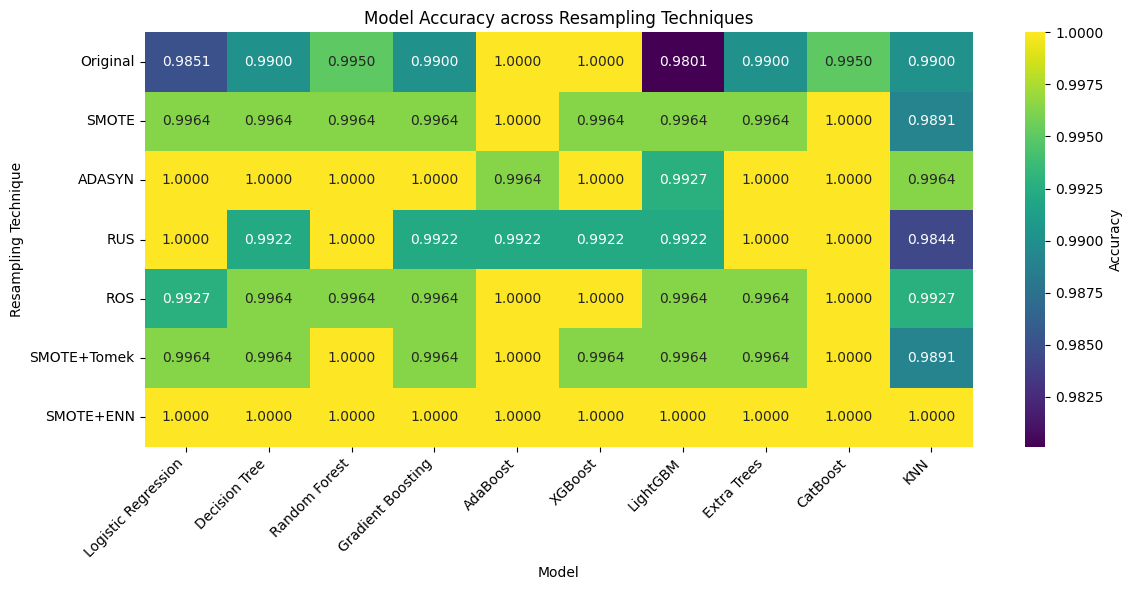

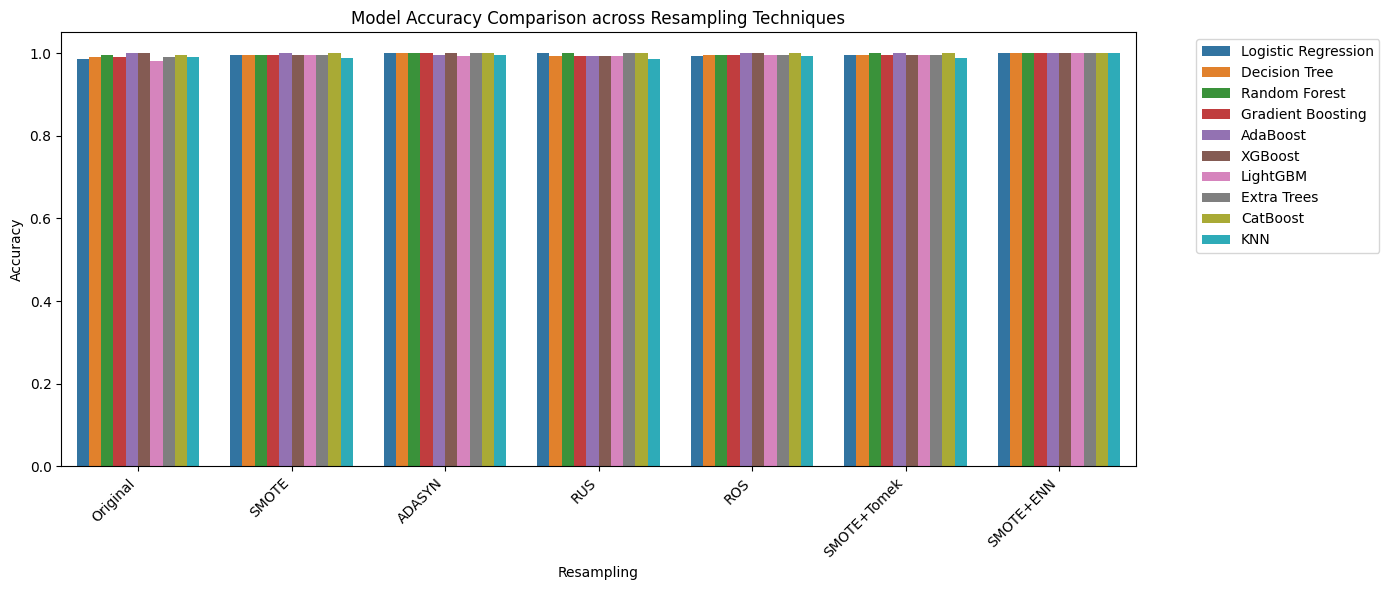

In [19]:
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Define base models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

base_models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "LightGBM": LGBMClassifier(verbose=-1),
    "Extra Trees": ExtraTreesClassifier(),
    "CatBoost": CatBoostClassifier(verbose=0),
    "KNN": KNeighborsClassifier()
}

# Step 2: Collect resampled datasets
datasets = {
    "Original": (X_train_org, X_test_org, y_train_org, y_test_org),
    "SMOTE": (X_train_smote, X_test_smote, y_train_smote, y_test_smote),
    "ADASYN": (X_train_adasyn, X_test_adasyn, y_train_adasyn, y_test_adasyn),
    "RUS": (X_train_rus, X_test_rus, y_train_rus, y_test_rus),
    "ROS": (X_train_ros, X_test_ros, y_train_ros, y_test_ros),
    "SMOTE+Tomek": (X_train_smotetomek, X_test_smotetomek, y_train_smotetomek, y_test_smotetomek),
    "SMOTE+ENN": (X_train_smotenn, X_test_smotenn, y_train_smotenn, y_test_smotenn)
}

# Step 3: Train and evaluate all models
results = {}

for ds_name, (X_train, X_test, y_train, y_test) in datasets.items():
    results[ds_name] = {}
    for model_name, model in base_models.items():
        clf = model
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        results[ds_name][model_name] = acc

# Step 4: Convert results to DataFrame
accuracy_df = pd.DataFrame(results).T

# Step 5: Plot Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(accuracy_df, annot=True, fmt=".4f", cmap="viridis", cbar_kws={'label': 'Accuracy'})
plt.title("Model Accuracy across Resampling Techniques")
plt.ylabel("Resampling Technique")
plt.xlabel("Model")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("model_accuracy_heatmap.png", dpi=300)
plt.show()

# Step 6: Plot Grouped Bar Chart
accuracy_df_plot = accuracy_df.reset_index().melt(id_vars="index")
accuracy_df_plot.columns = ['Resampling', 'Model', 'Accuracy']

plt.figure(figsize=(14, 6))
sns.barplot(data=accuracy_df_plot, x="Resampling", y="Accuracy", hue="Model")
plt.title("Model Accuracy Comparison across Resampling Techniques")
plt.xticks(rotation=45, ha='right')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig("new dengmodel_accuracy_comparison.png", dpi=300)
plt.show()


In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, mean_squared_error
import numpy as np

# Step 3: Train and evaluate all models with multiple metrics
results = {}

for ds_name, (X_train, X_test, y_train, y_test) in datasets.items():
    results[ds_name] = {}
    for model_name, model in base_models.items():
        clf = model
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)

        # Compute metrics
        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
        rec = recall_score(y_test, y_pred, average='weighted', zero_division=0)
        f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
        kappa = cohen_kappa_score(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)

        # Store results
        results[ds_name][model_name] = {
            "Accuracy": acc,
            "Precision": prec,
            "Recall": rec,
            "F1-Score": f1,
            "Kappa": kappa,
            "MSE": mse,
            "RMSE": rmse
        }

# Step 4: Convert results to MultiIndex DataFrame
metrics_df = pd.DataFrame(results).T
metrics_df = metrics_df.stack().unstack(level=1)  # tidy format

# Display full results
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 200)
print(metrics_df)

# Optional: Save results to CSV
metrics_df.to_csv("model_results_with_metrics.csv")


                                           Logistic Regression                                      Decision Tree                                      Random Forest  \
Original     {'Accuracy': 0.9850746268656716, 'Precision': ...  {'Accuracy': 0.9900497512437811, 'Precision': ...  {'Accuracy': 0.9900497512437811, 'Precision': ...   
SMOTE        {'Accuracy': 0.9963503649635036, 'Precision': ...  {'Accuracy': 0.9963503649635036, 'Precision': ...  {'Accuracy': 0.9963503649635036, 'Precision': ...   
ADASYN       {'Accuracy': 1.0, 'Precision': 1.0, 'Recall': ...  {'Accuracy': 1.0, 'Precision': 1.0, 'Recall': ...  {'Accuracy': 1.0, 'Precision': 1.0, 'Recall': ...   
RUS          {'Accuracy': 1.0, 'Precision': 1.0, 'Recall': ...  {'Accuracy': 0.9921875, 'Precision': 0.9922945...  {'Accuracy': 1.0, 'Precision': 1.0, 'Recall': ...   
ROS          {'Accuracy': 0.9927007299270073, 'Precision': ...  {'Accuracy': 0.9963503649635036, 'Precision': ...  {'Accuracy': 0.9963503649635036, 'Precision':

In [21]:


!pip -q install xgboost lightgbm catboost shap


In [22]:

# ⚙️ Split & Preprocess
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.utils.multiclass import type_of_target

assert 'df' in globals(), "DataFrame `df` not found. Load your dataset first."
assert 'TARGET' in globals() and TARGET in df.columns, "Please set TARGET to your target column."

# Basic cleaning
df_clean = df.copy()
y = df_clean[TARGET]
X = df_clean.drop(columns=[TARGET])

# Detect task
target_type = type_of_target(y)
IS_CLASSIFICATION = target_type in ['binary','multiclass','multiclass-indicator'] or y.dtype.name in ['object','category','bool']
print("Detected task:", "Classification" if IS_CLASSIFICATION else "Regression")

# Train/val/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y if IS_CLASSIFICATION else None
)

# Preprocess pipelines
num_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = [c for c in X_train.columns if c not in num_cols]

# OneHot to dense for broad model compatibility across Colab
try:
    ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
except TypeError:
    ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

numeric_pre = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_pre = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', ohe)
])

preprocess = ColumnTransformer([
    ('num', numeric_pre, num_cols),
    ('cat', categorical_pre, cat_cols)
], remainder='drop')

print(f"Numeric cols: {len(num_cols)} | Categorical cols: {len(cat_cols)}")


Detected task: Classification
Numeric cols: 8 | Categorical cols: 0


In [23]:

# 📏 Metrics & Plot Helpers
import math
import matplotlib.pyplot as plt
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score,
                             mean_squared_error, roc_curve, auc, precision_recall_curve, average_precision_score)
from sklearn.calibration import calibration_curve
import numpy as np
import pandas as pd

AVERAGE = 'weighted'

def print_classification_metrics(y_true, y_pred):
    print(f"Accuracy : {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred, average=AVERAGE, zero_division=0):.4f}")
    print(f"Recall   : {recall_score(y_true, y_pred, average=AVERAGE, zero_division=0):.4f}")
    print(f"F1-score : {f1_score(y_true, y_pred, average=AVERAGE, zero_division=0):.4f}")
    try:
        print(f"Kappa    : {cohen_kappa_score(y_true, y_pred):.4f}")
    except Exception:
        pass

def mase(y_true, y_pred):
    y_true = pd.Series(y_true).reset_index(drop=True)
    y_pred = pd.Series(y_pred).reset_index(drop=True)
    if len(y_true) <= 1: return np.nan
    denom = (y_true.iloc[1:] - y_true.shift(1).dropna()).abs().mean()
    numer = (y_true.iloc[1:] - y_pred.iloc[1:]).abs().mean()
    return numer/denom if denom!=0 else np.nan

def print_regression_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    print(f"MSE  : {mse:.4f}")
    print(f"RMSE : {math.sqrt(mse):.4f}")
    print(f"MASE : {mase(y_true, y_pred):.4f}")

def plot_roc_prc(y_true, proba, classes=None, title_prefix=""):
    if proba is None:
        print("No probabilities available for ROC/PRC.")
        return
    # Binary vs Multiclass
    if proba.ndim == 1 or proba.shape[1] == 1:
        scores = proba.ravel()
        y_bin = (y_true == np.unique(y_true)[-1]).astype(int)
        fpr, tpr, _ = roc_curve(y_bin, scores)
        auc_val = auc(fpr, tpr)
        plt.figure()
        plt.plot(fpr, tpr, label=f"AUC={auc_val:.3f}")
        plt.plot([0,1],[0,1],'--')
        plt.title(f"{title_prefix} ROC")
        plt.xlabel("FPR"); plt.ylabel("TPR"); plt.legend(); plt.show()

        prec, rec, _ = precision_recall_curve(y_bin, scores)
        ap = average_precision_score(y_bin, scores)
        plt.figure()
        plt.plot(rec, prec, label=f"AP={ap:.3f}")
        plt.title(f"{title_prefix} Precision–Recall")
        plt.xlabel("Recall"); plt.ylabel("Precision"); plt.legend(); plt.show()
    else:
        # One-vs-rest per class
        if classes is None:
            classes = np.arange(proba.shape[1])
        for i, cls in enumerate(classes):
            y_bin = (y_true == cls).astype(int) if not isinstance(y_true.iloc[0], str) else (y_true == cls).astype(int)
            fpr, tpr, _ = roc_curve(y_bin, proba[:, i])
            auc_val = auc(fpr, tpr)
            plt.figure()
            plt.plot(fpr, tpr, label=f"Class {cls} AUC={auc_val:.3f}")
            plt.plot([0,1],[0,1],'--')
            plt.title(f"{title_prefix} ROC — class {cls}")
            plt.xlabel("FPR"); plt.ylabel("TPR"); plt.legend(); plt.show()

            prec, rec, _ = precision_recall_curve(y_bin, proba[:, i])
            ap = average_precision_score(y_bin, proba[:, i])
            plt.figure()
            plt.plot(rec, prec, label=f"Class {cls} AP={ap:.3f}")
            plt.title(f"{title_prefix} PRC — class {cls}")
            plt.xlabel("Recall"); plt.ylabel("Precision"); plt.legend(); plt.show()

def plot_calibration_ks(y_true, scores, title_prefix=""):
    # Binary only
    try:
        y_bin = (y_true == np.unique(y_true)[-1]).astype(int)
        prob_true, prob_pred = calibration_curve(y_bin, scores, n_bins=10, strategy='quantile')
        plt.figure()
        plt.plot(prob_pred, prob_true, marker='o')
        plt.plot([0,1],[0,1],'--')
        plt.title(f"{title_prefix} Calibration")
        plt.xlabel("Predicted"); plt.ylabel("Observed"); plt.show()

        # KS
        grid = np.linspace(0,1,200)
        scores_pos = scores[y_bin==1]
        scores_neg = scores[y_bin==0]
        cdf_pos = [(scores_pos<=g).mean() for g in grid]
        cdf_neg = [(scores_neg<=g).mean() for g in grid]
        ks_stat = np.max(np.abs(np.array(cdf_pos)-np.array(cdf_neg)))
        plt.figure()
        plt.plot(grid, cdf_pos, label='Positive CDF')
        plt.plot(grid, cdf_neg, label='Negative CDF')
        plt.title(f"{title_prefix} KS (D={ks_stat:.3f})")
        plt.xlabel("Score"); plt.ylabel("CDF"); plt.legend(); plt.show()
    except Exception as e:
        print("Calibration/KS skipped:", e)


## 🔹 Logistic Regression

Accuracy : 1.0000
Precision: 1.0000
Recall   : 1.0000
F1-score : 1.0000
Kappa    : 1.0000


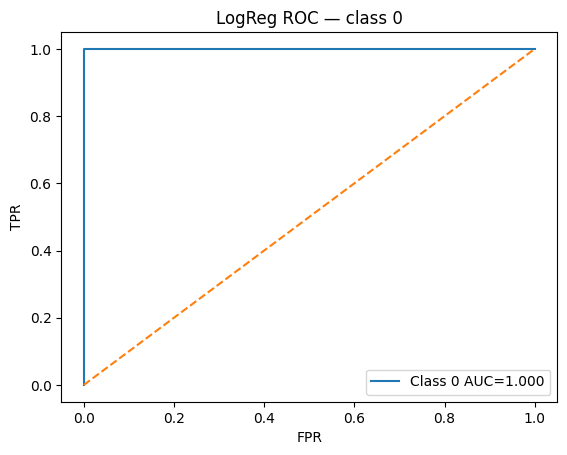

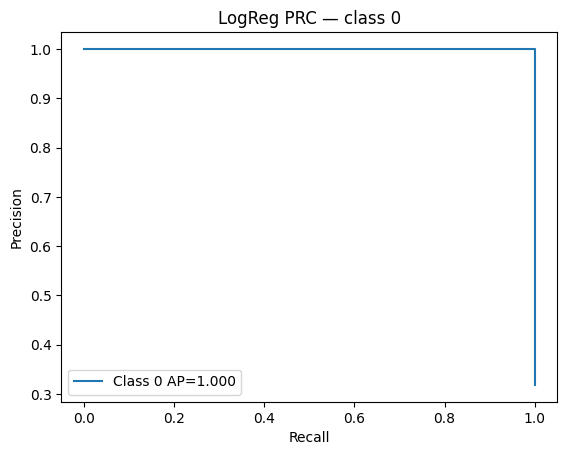

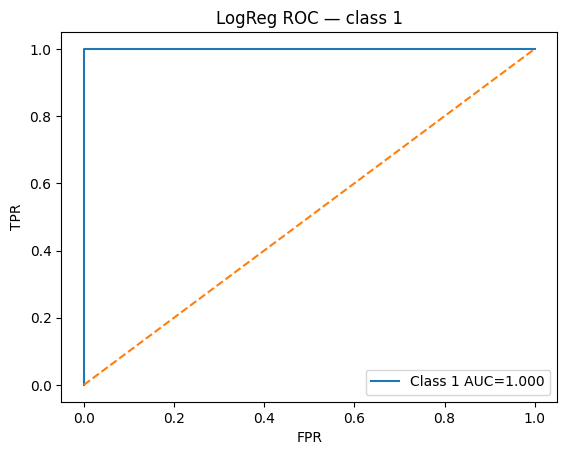

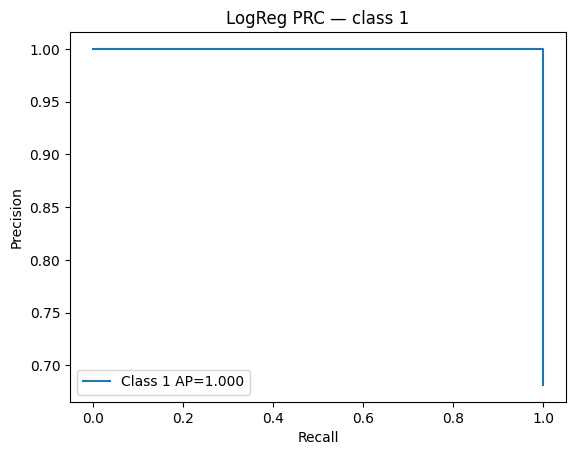

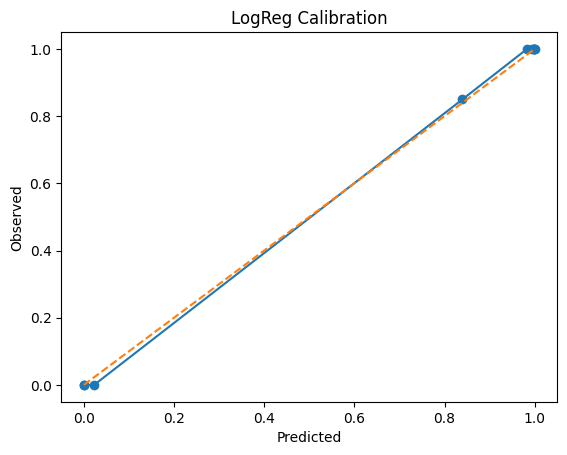

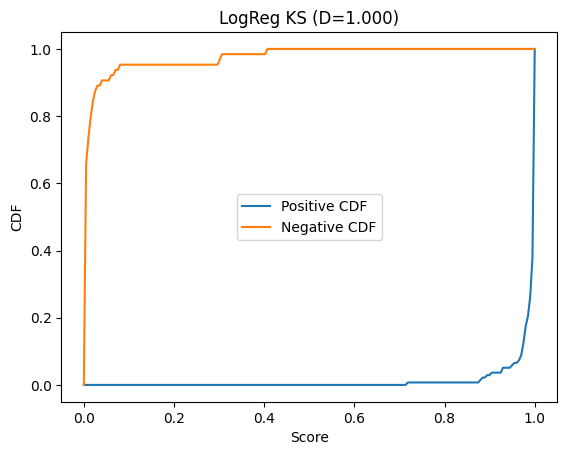

In [24]:

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

if IS_CLASSIFICATION:
    logreg = Pipeline([('prep', preprocess),
                       ('clf', LogisticRegression(max_iter=2000))])
    logreg.fit(X_train, y_train)
    y_pred = logreg.predict(X_test)
    print_classification_metrics(y_test, y_pred)
    proba = logreg.predict_proba(X_test) if hasattr(logreg, 'predict_proba') else None
    if proba is not None:
        if proba.shape[1]==2:
            scores = proba[:,1]
        else:
            scores = None
        plot_roc_prc(y_test, proba, title_prefix='LogReg')
        if scores is not None:
            plot_calibration_ks(y_test, scores, title_prefix='LogReg')
else:
    print("Skipping Logistic Regression: dataset detected as regression.")


## 🔹 Decision Tree

Accuracy : 1.0000
Precision: 1.0000
Recall   : 1.0000
F1-score : 1.0000
Kappa    : 1.0000


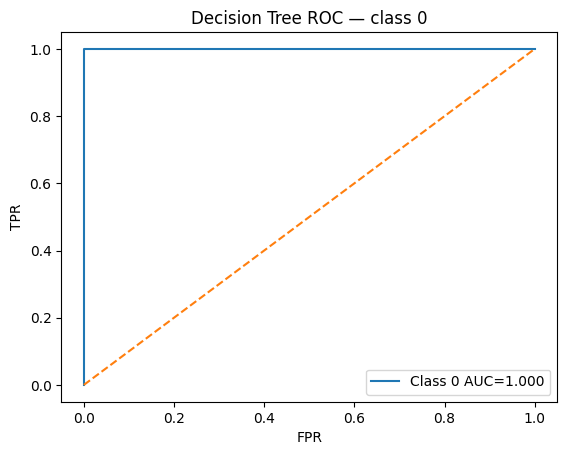

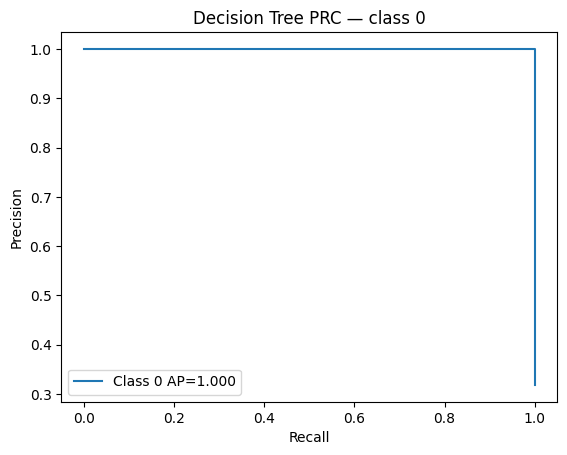

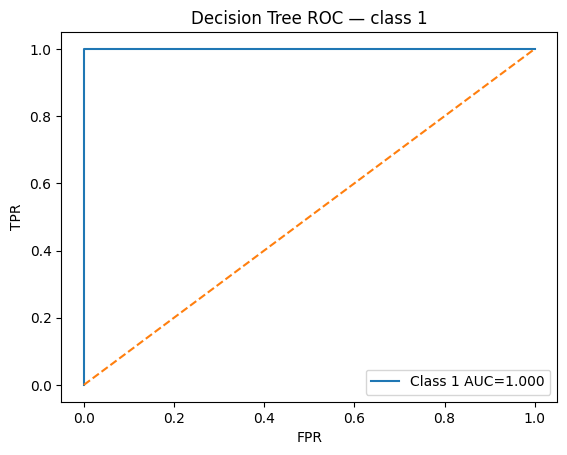

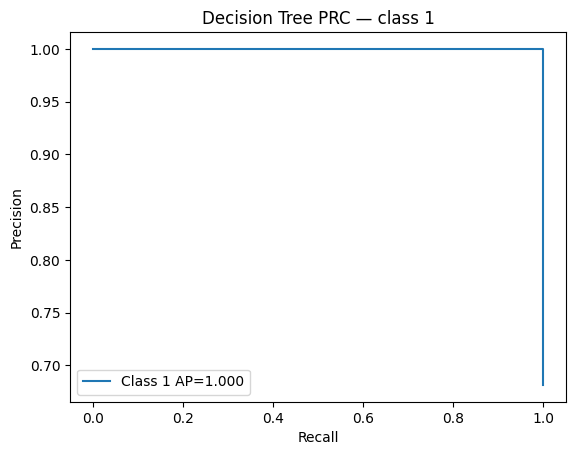

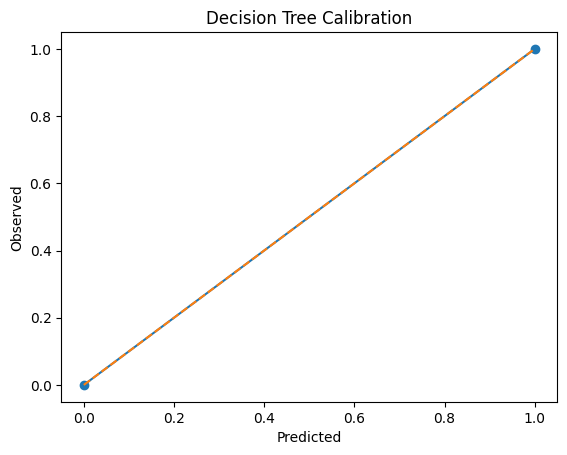

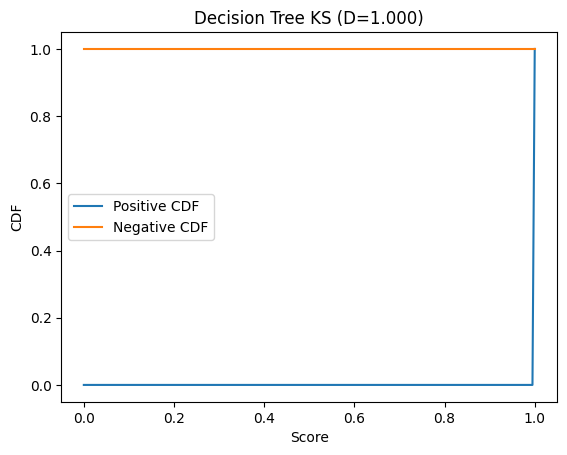

In [25]:

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.pipeline import Pipeline

if IS_CLASSIFICATION:
    dt = Pipeline([('prep', preprocess),
                   ('clf', DecisionTreeClassifier(random_state=42))])
else:
    dt = Pipeline([('prep', preprocess),
                   ('reg', DecisionTreeRegressor(random_state=42))])
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
if IS_CLASSIFICATION:
    print_classification_metrics(y_test, y_pred)
    proba = dt.predict_proba(X_test) if hasattr(dt, 'predict_proba') else None
    if proba is not None:
        scores = proba[:,1] if proba.shape[1]==2 else None
        plot_roc_prc(y_test, proba, title_prefix='Decision Tree')
        if scores is not None:
            plot_calibration_ks(y_test, scores, title_prefix='Decision Tree')
else:
    print_regression_metrics(y_test, y_pred)


## 🔹 Random Forest

Accuracy : 1.0000
Precision: 1.0000
Recall   : 1.0000
F1-score : 1.0000
Kappa    : 1.0000


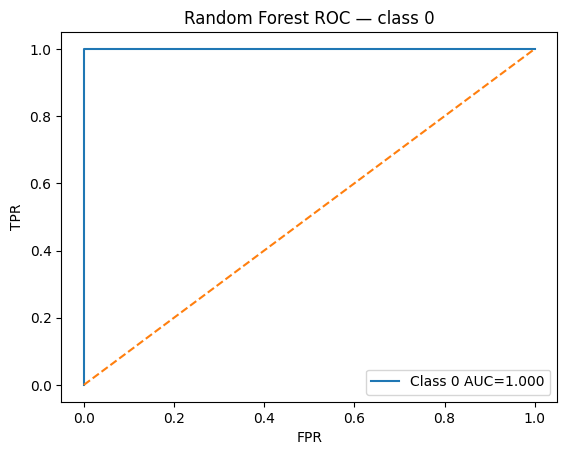

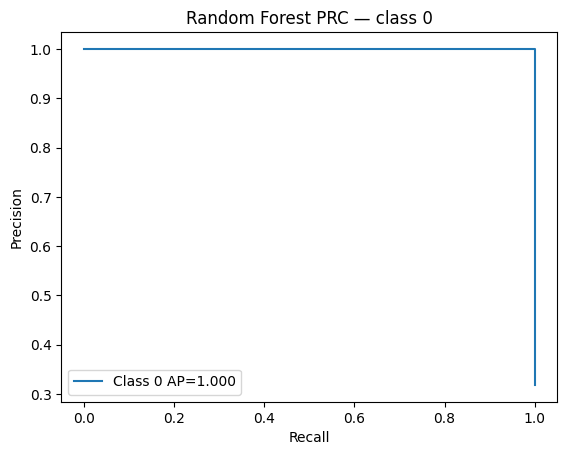

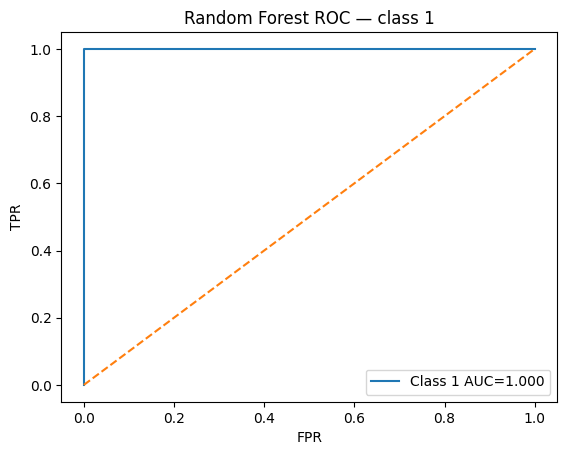

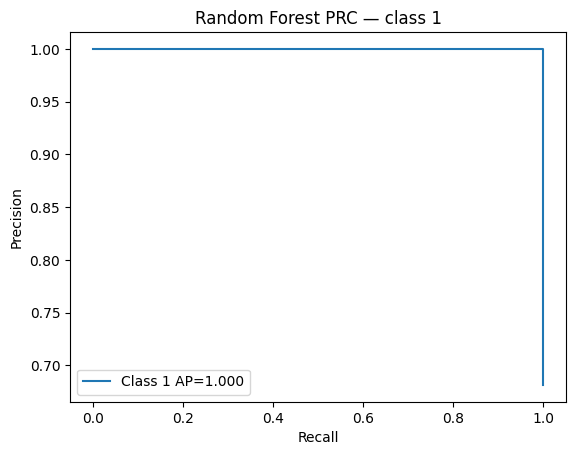

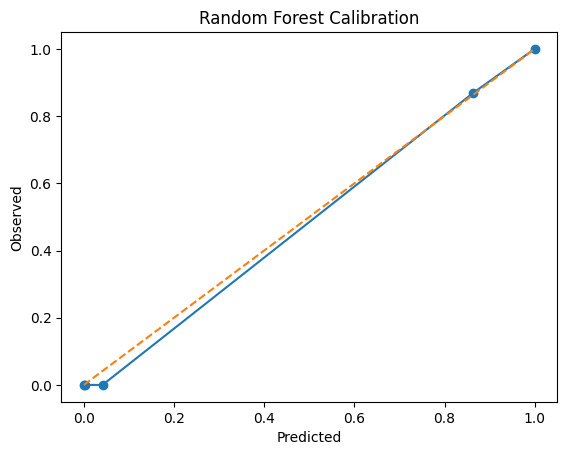

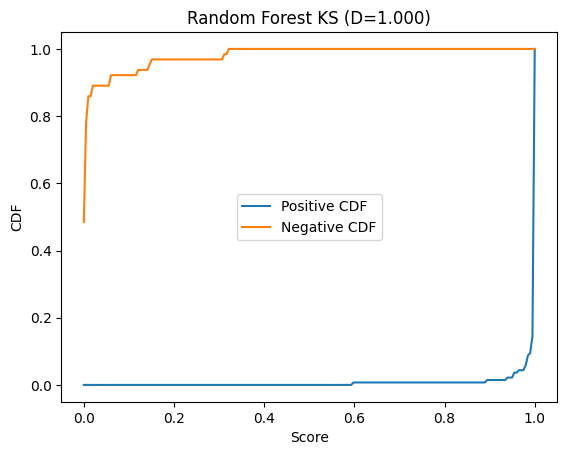

In [26]:

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.pipeline import Pipeline

if IS_CLASSIFICATION:
    rf = Pipeline([('prep', preprocess),
                   ('clf', RandomForestClassifier(n_estimators=300, random_state=42))])
else:
    rf = Pipeline([('prep', preprocess),
                   ('reg', RandomForestRegressor(n_estimators=300, random_state=42))])
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
if IS_CLASSIFICATION:
    print_classification_metrics(y_test, y_pred)
    proba = rf.predict_proba(X_test) if hasattr(rf, 'predict_proba') else None
    if proba is not None:
        scores = proba[:,1] if proba.shape[1]==2 else None
        plot_roc_prc(y_test, proba, title_prefix='Random Forest')
        if scores is not None:
            plot_calibration_ks(y_test, scores, title_prefix='Random Forest')
else:
    print_regression_metrics(y_test, y_pred)


## 🔹 Support Vector Machine

Accuracy : 1.0000
Precision: 1.0000
Recall   : 1.0000
F1-score : 1.0000
Kappa    : 1.0000


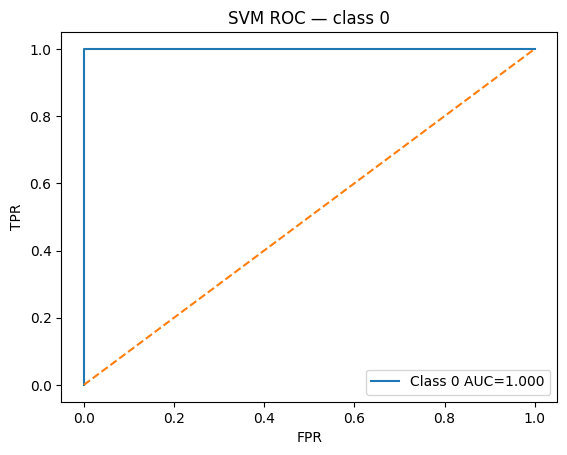

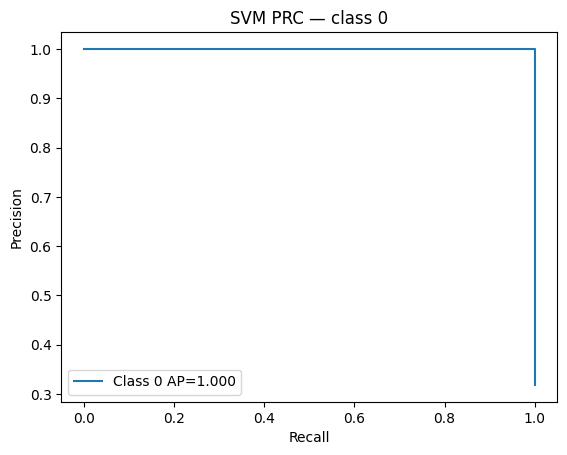

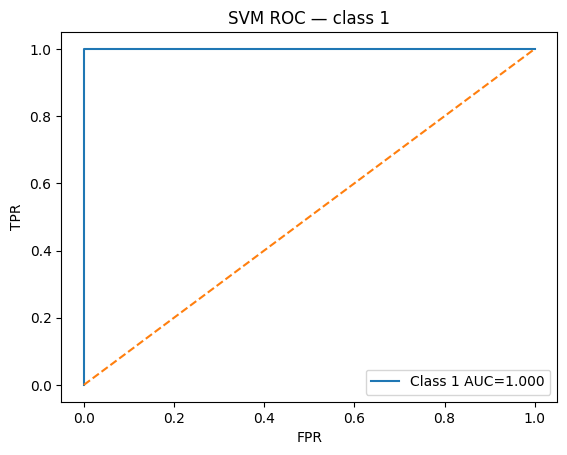

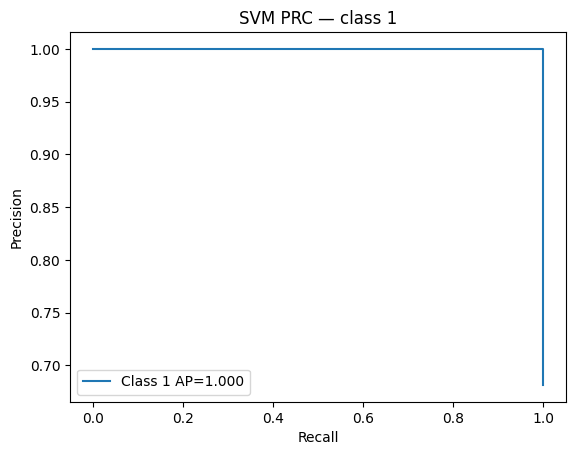

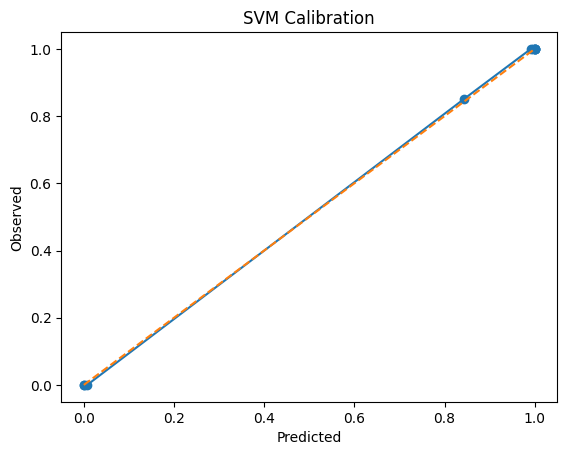

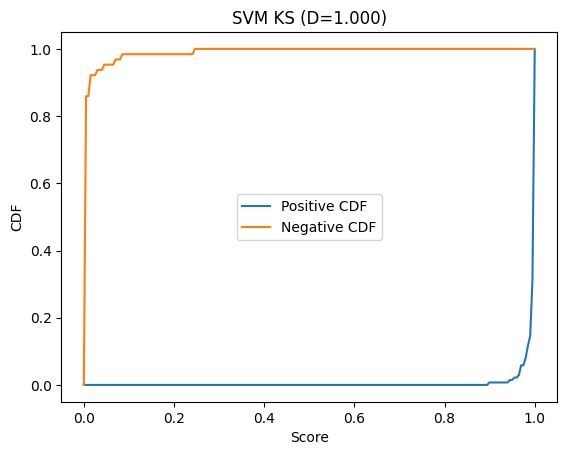

In [27]:

from sklearn.svm import SVC, SVR
from sklearn.pipeline import Pipeline

if IS_CLASSIFICATION:
    svm = Pipeline([('prep', preprocess),
                    ('clf', SVC(probability=True, random_state=42))])
else:
    svm = Pipeline([('prep', preprocess),
                    ('reg', SVR())])
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
if IS_CLASSIFICATION:
    print_classification_metrics(y_test, y_pred)
    proba = svm.predict_proba(X_test) if hasattr(svm, 'predict_proba') else None
    if proba is not None:
        scores = proba[:,1] if proba.shape[1]==2 else None
        plot_roc_prc(y_test, proba, title_prefix='SVM')
        if scores is not None:
            plot_calibration_ks(y_test, scores, title_prefix='SVM')
else:
    print_regression_metrics(y_test, y_pred)


## 🔹 K-Nearest Neighbors

Accuracy : 0.9950
Precision: 0.9951
Recall   : 0.9950
F1-score : 0.9950
Kappa    : 0.9885


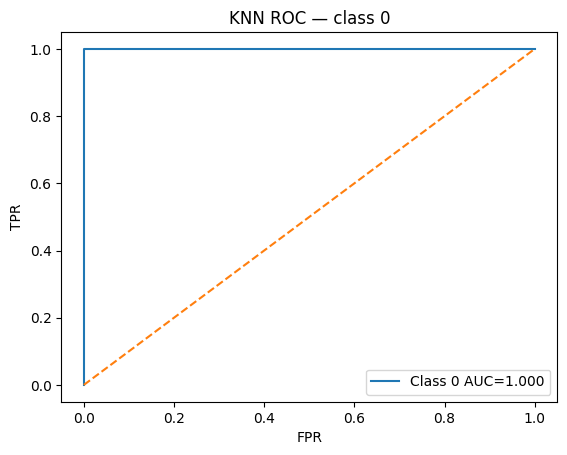

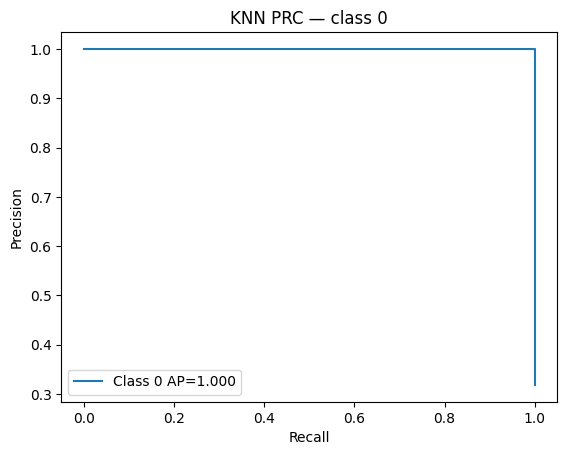

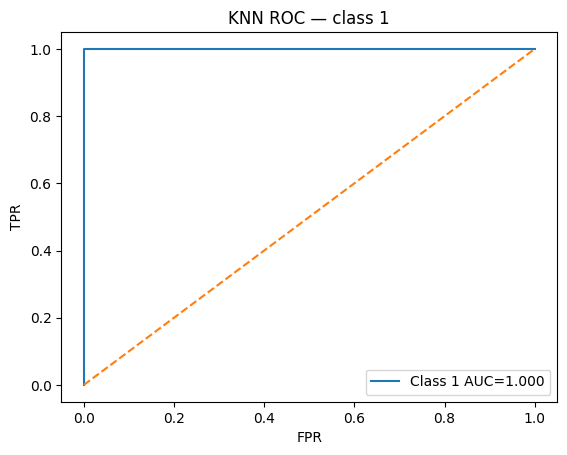

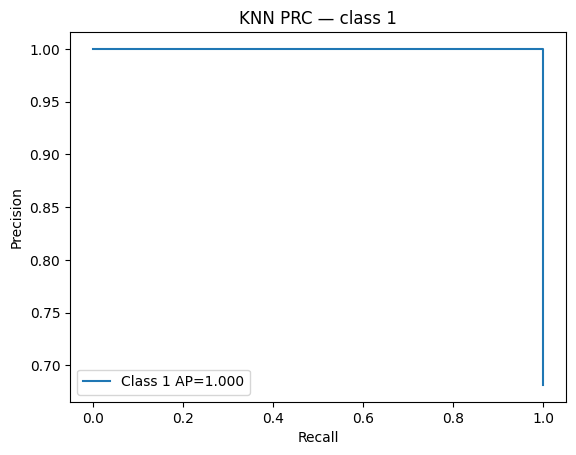

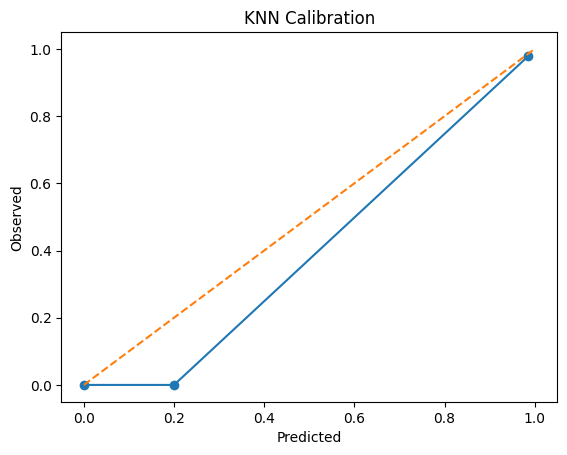

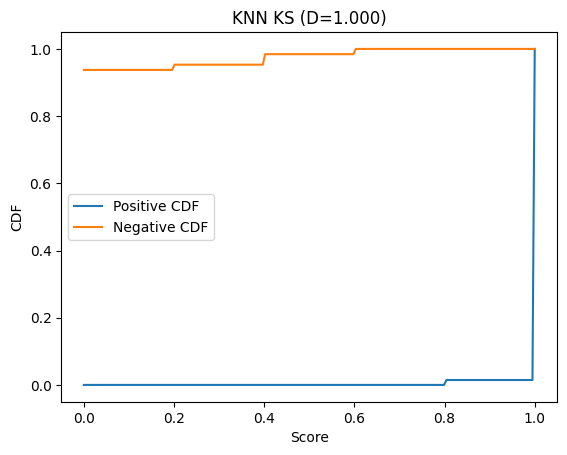

In [28]:

from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.pipeline import Pipeline

if IS_CLASSIFICATION:
    knn = Pipeline([('prep', preprocess),
                    ('clf', KNeighborsClassifier())])
else:
    knn = Pipeline([('prep', preprocess),
                    ('reg', KNeighborsRegressor())])
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
if IS_CLASSIFICATION:
    print_classification_metrics(y_test, y_pred)
    # KNN can output predict_proba for classification
    proba = knn.predict_proba(X_test) if hasattr(knn, 'predict_proba') else None
    if proba is not None:
        scores = proba[:,1] if proba.shape[1]==2 else None
        plot_roc_prc(y_test, proba, title_prefix='KNN')
        if scores is not None:
            plot_calibration_ks(y_test, scores, title_prefix='KNN')
else:
    print_regression_metrics(y_test, y_pred)


## 🔹 Naïve Bayes (Gaussian)

Accuracy : 0.4478
Precision: 0.7980
Recall   : 0.4478
F1-score : 0.3880
Kappa    : 0.1298


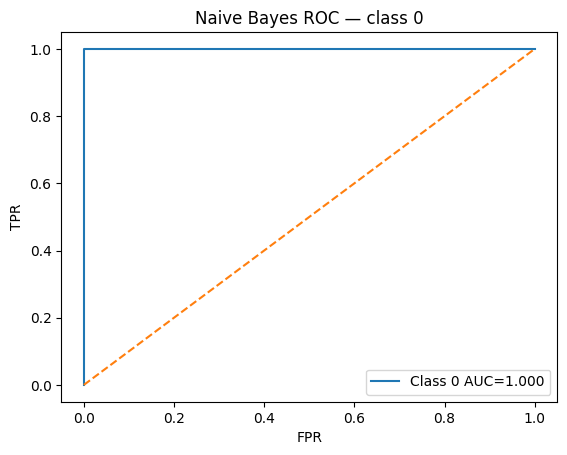

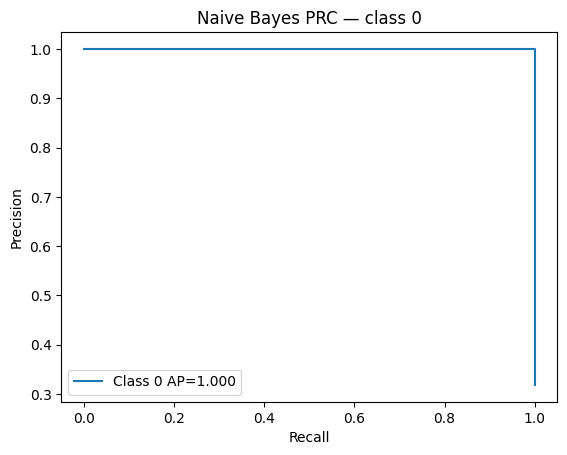

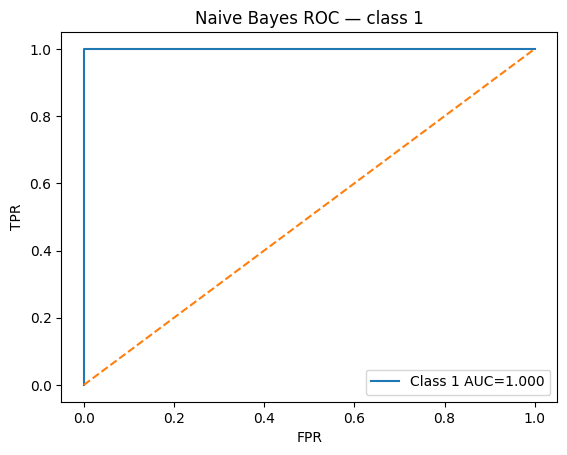

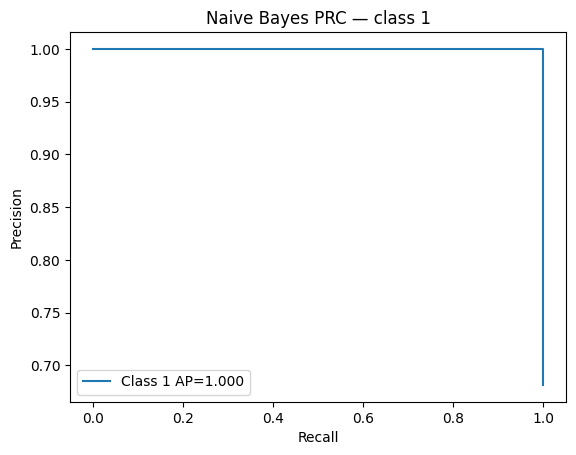

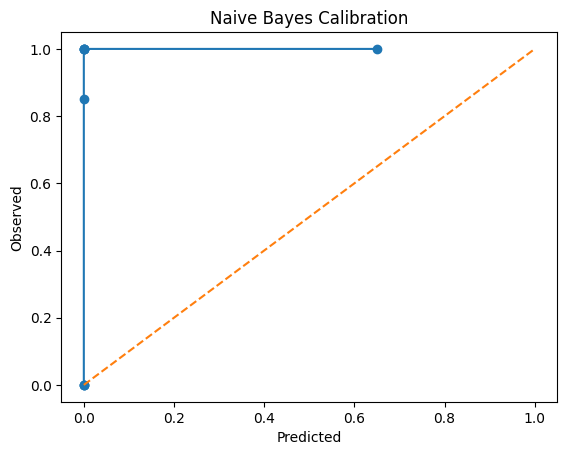

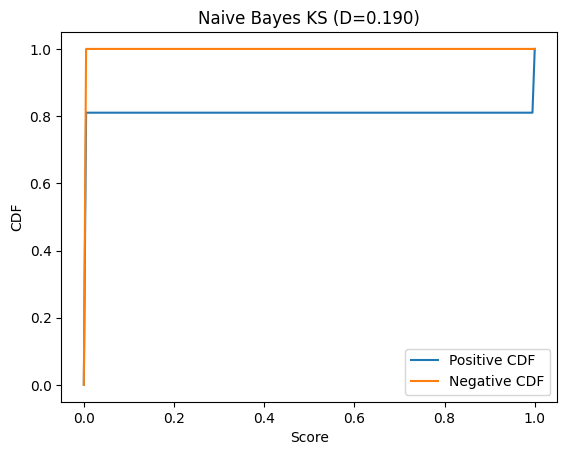

In [29]:

from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
import numpy as np

if IS_CLASSIFICATION:
    # Ensure dense array for GaussianNB
    nb_pipeline = Pipeline([('prep', preprocess),
                            ('to_dense', FunctionTransformer(lambda x: np.asarray(x), accept_sparse=True)),
                            ('clf', GaussianNB())])
    nb_pipeline.fit(X_train, y_train)
    y_pred = nb_pipeline.predict(X_test)
    print_classification_metrics(y_test, y_pred)
    proba = nb_pipeline.predict_proba(X_test) if hasattr(nb_pipeline, 'predict_proba') else None
    if proba is not None:
        scores = proba[:,1] if proba.shape[1]==2 else None
        plot_roc_prc(y_test, proba, title_prefix='Naive Bayes')
        if scores is not None:
            plot_calibration_ks(y_test, scores, title_prefix='Naive Bayes')
else:
    print("Skipping Naïve Bayes for regression.")


## 🔹 Gradient Boosting (sklearn)

Accuracy : 1.0000
Precision: 1.0000
Recall   : 1.0000
F1-score : 1.0000
Kappa    : 1.0000


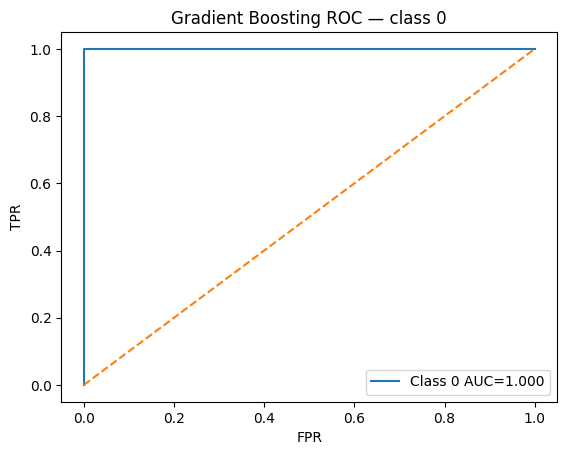

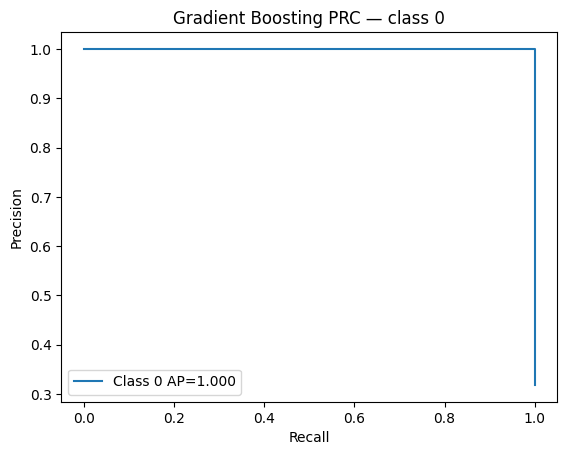

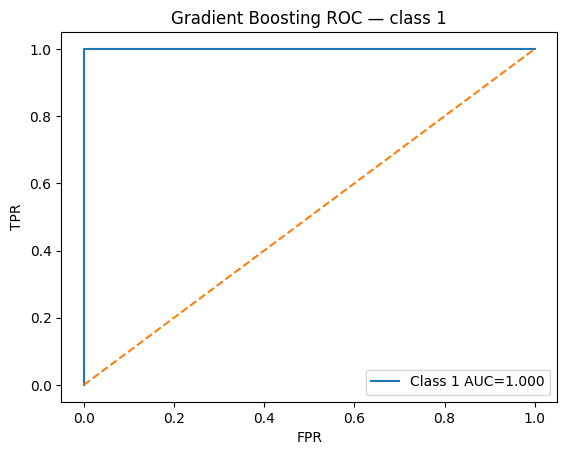

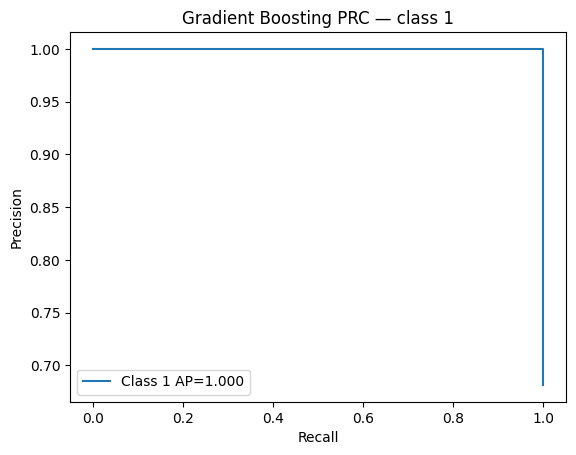

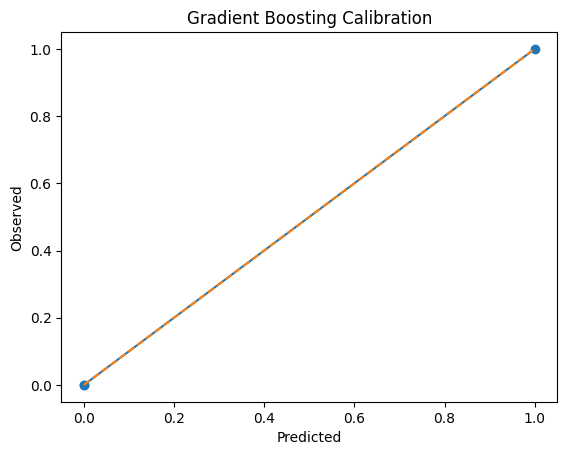

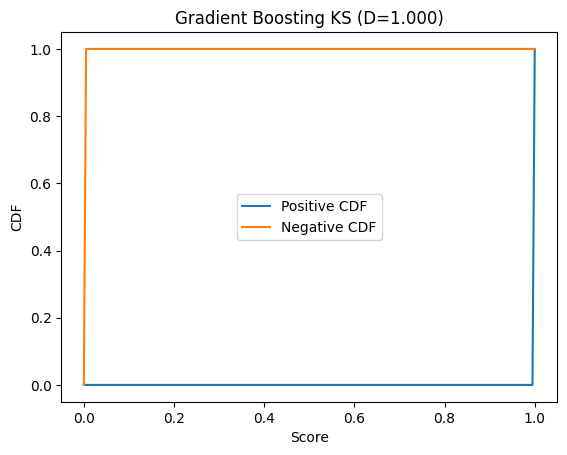

In [30]:

from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.pipeline import Pipeline

if IS_CLASSIFICATION:
    gb = Pipeline([('prep', preprocess),
                   ('clf', GradientBoostingClassifier(random_state=42))])
else:
    gb = Pipeline([('prep', preprocess),
                   ('reg', GradientBoostingRegressor(random_state=42))])
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
if IS_CLASSIFICATION:
    print_classification_metrics(y_test, y_pred)
    proba = gb.predict_proba(X_test) if hasattr(gb, 'predict_proba') else None
    if proba is not None:
        scores = proba[:,1] if proba.shape[1]==2 else None
        plot_roc_prc(y_test, proba, title_prefix='Gradient Boosting')
        if scores is not None:
            plot_calibration_ks(y_test, scores, title_prefix='Gradient Boosting')
else:
    print_regression_metrics(y_test, y_pred)


## 🔹 XGBoost

Accuracy : 1.0000
Precision: 1.0000
Recall   : 1.0000
F1-score : 1.0000
Kappa    : 1.0000


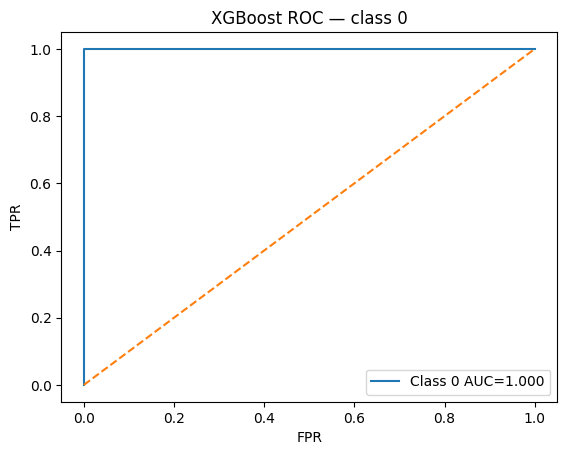

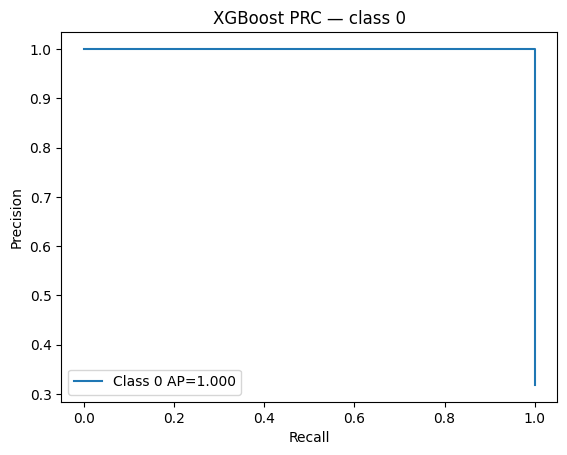

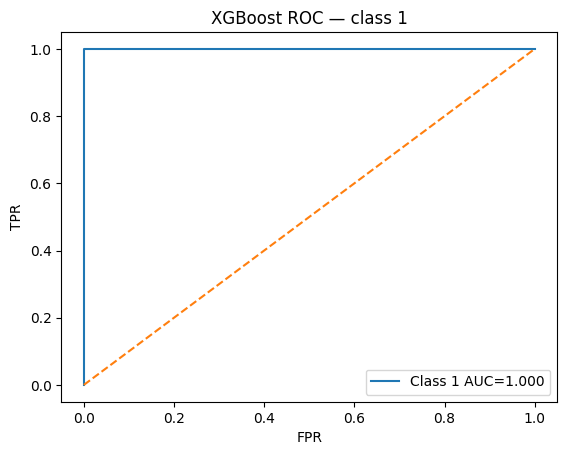

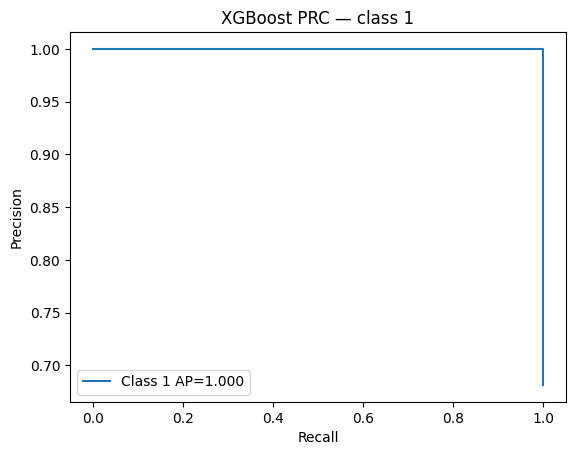

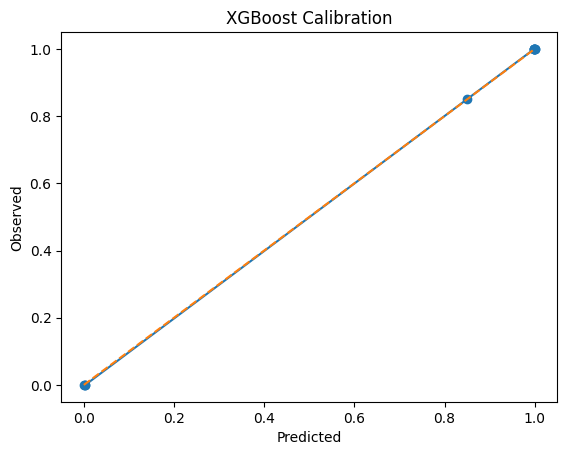

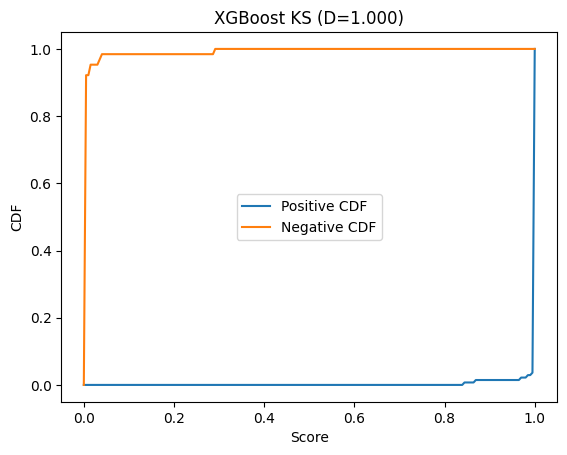

In [31]:

from xgboost import XGBClassifier, XGBRegressor
from sklearn.pipeline import Pipeline

if IS_CLASSIFICATION:
    xgb = Pipeline([('prep', preprocess),
                    ('clf', XGBClassifier(
                        n_estimators=400, max_depth=6, learning_rate=0.05,
                        subsample=0.8, colsample_bytree=0.8, eval_metric='logloss', tree_method='hist'
                    ))])
else:
    xgb = Pipeline([('prep', preprocess),
                    ('reg', XGBRegressor(
                        n_estimators=400, max_depth=6, learning_rate=0.05,
                        subsample=0.8, colsample_bytree=0.8, tree_method='hist'
                    ))])
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
if IS_CLASSIFICATION:
    print_classification_metrics(y_test, y_pred)
    proba = xgb.predict_proba(X_test) if hasattr(xgb, 'predict_proba') else None
    if proba is not None:
        scores = proba[:,1] if proba.shape[1]==2 else None
        plot_roc_prc(y_test, proba, title_prefix='XGBoost')
        if scores is not None:
            plot_calibration_ks(y_test, scores, title_prefix='XGBoost')
else:
    print_regression_metrics(y_test, y_pred)


## 🔹 LightGBM

Accuracy : 1.0000
Precision: 1.0000
Recall   : 1.0000
F1-score : 1.0000
Kappa    : 1.0000


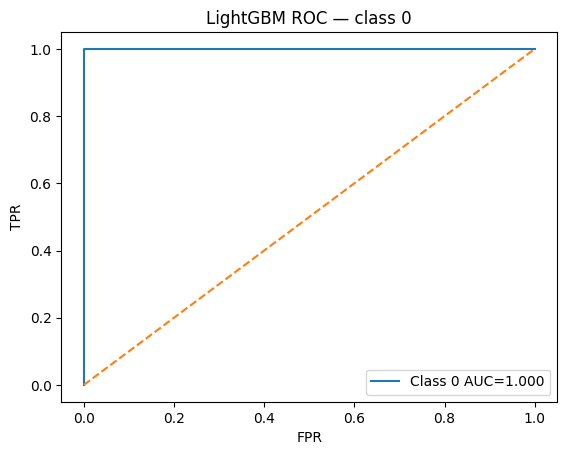

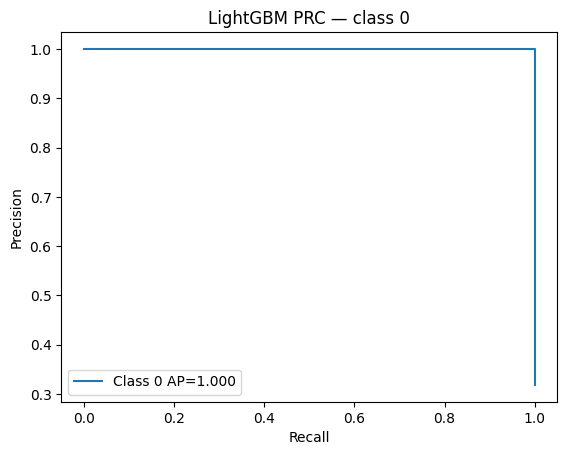

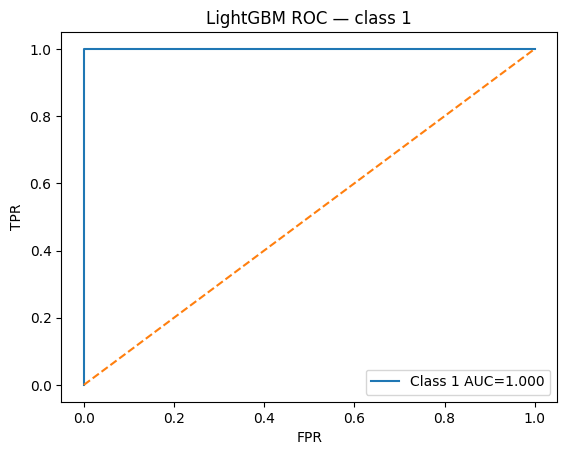

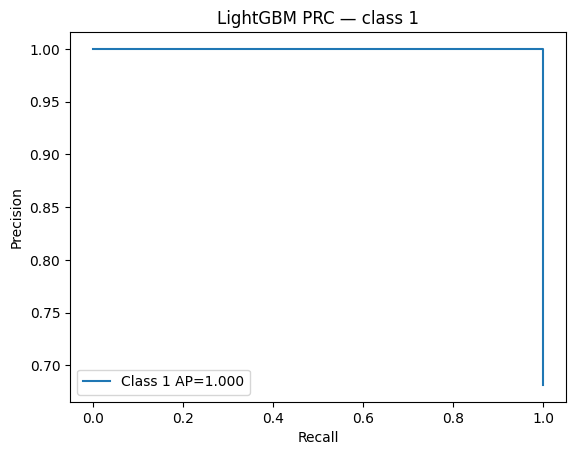

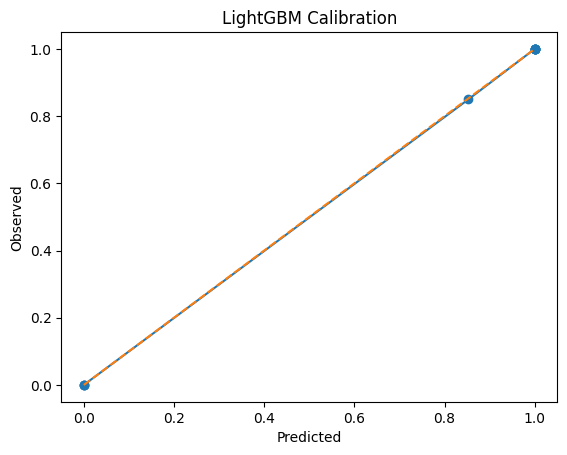

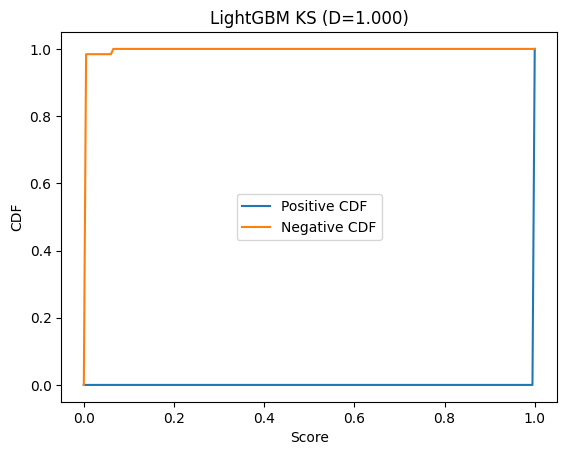

In [32]:

from lightgbm import LGBMClassifier, LGBMRegressor
from sklearn.pipeline import Pipeline

if IS_CLASSIFICATION:
    lgb = Pipeline([('prep', preprocess),
                    ('clf', LGBMClassifier(n_estimators=400, learning_rate=0.05, subsample=0.8, colsample_bytree=0.8))])
else:
    lgb = Pipeline([('prep', preprocess),
                    ('reg', LGBMRegressor(n_estimators=400, learning_rate=0.05, subsample=0.8, colsample_bytree=0.8))])
lgb.fit(X_train, y_train)
y_pred = lgb.predict(X_test)
if IS_CLASSIFICATION:
    print_classification_metrics(y_test, y_pred)
    proba = lgb.predict_proba(X_test) if hasattr(lgb, 'predict_proba') else None
    if proba is not None:
        scores = proba[:,1] if proba.shape[1]==2 else None
        plot_roc_prc(y_test, proba, title_prefix='LightGBM')
        if scores is not None:
            plot_calibration_ks(y_test, scores, title_prefix='LightGBM')
else:
    print_regression_metrics(y_test, y_pred)


## 🔹 CatBoost

Accuracy : 1.0000
Precision: 1.0000
Recall   : 1.0000
F1-score : 1.0000
Kappa    : 1.0000


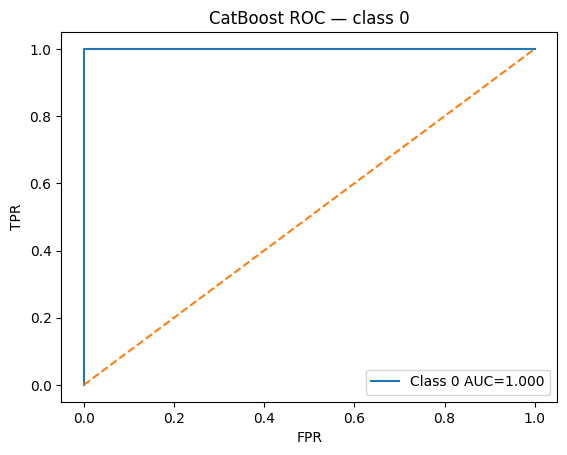

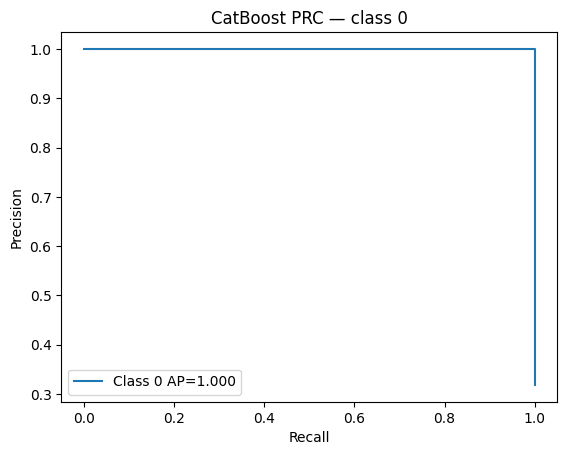

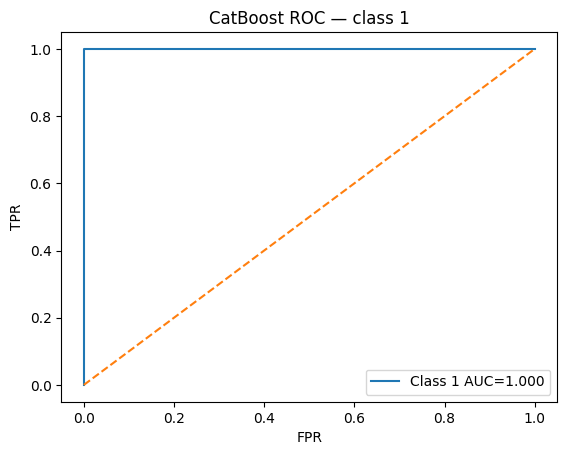

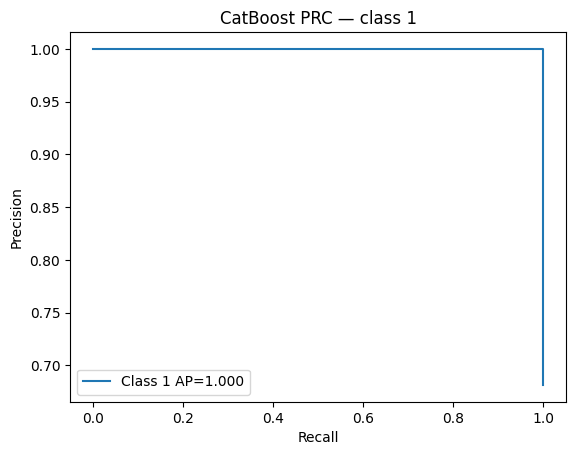

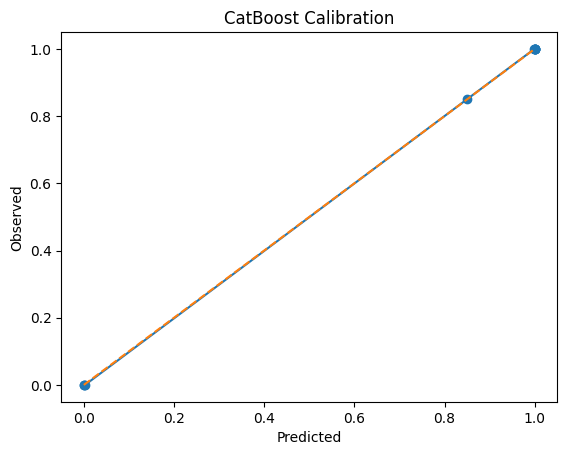

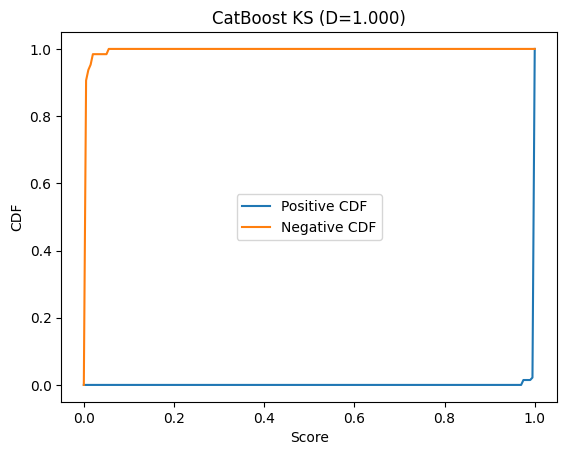

In [33]:

from catboost import CatBoostClassifier, CatBoostRegressor
from sklearn.pipeline import Pipeline

if IS_CLASSIFICATION:
    cat = Pipeline([('prep', preprocess),
                    ('clf', CatBoostClassifier(verbose=0, iterations=400, learning_rate=0.05, depth=6))])
else:
    cat = Pipeline([('prep', preprocess),
                    ('reg', CatBoostRegressor(verbose=0, iterations=400, learning_rate=0.05, depth=6))])
cat.fit(X_train, y_train)
y_pred = cat.predict(X_test)
if IS_CLASSIFICATION:
    print_classification_metrics(y_test, y_pred)
    proba = cat.predict_proba(X_test) if hasattr(cat, 'predict_proba') else None
    if proba is not None:
        scores = proba[:,1] if proba.shape[1]==2 else None
        plot_roc_prc(y_test, proba, title_prefix='CatBoost')
        if scores is not None:
            plot_calibration_ks(y_test, scores, title_prefix='CatBoost')
else:
    print_regression_metrics(y_test, y_pred)


## 🔹 Extra Trees

Accuracy : 1.0000
Precision: 1.0000
Recall   : 1.0000
F1-score : 1.0000
Kappa    : 1.0000


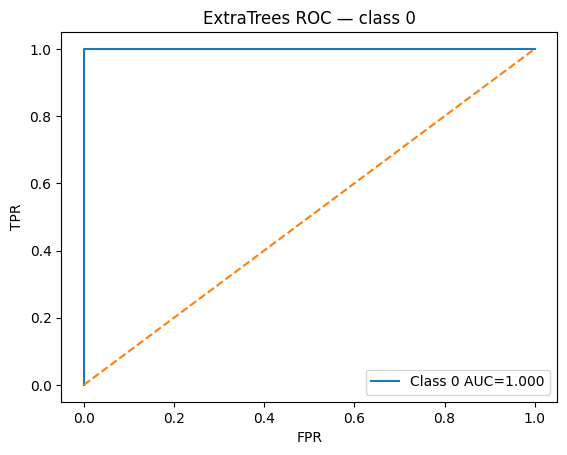

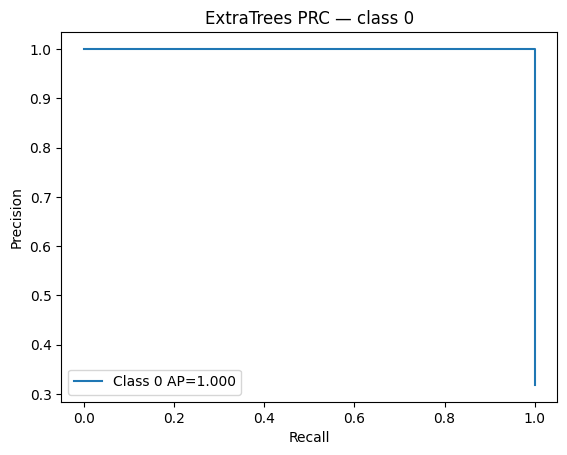

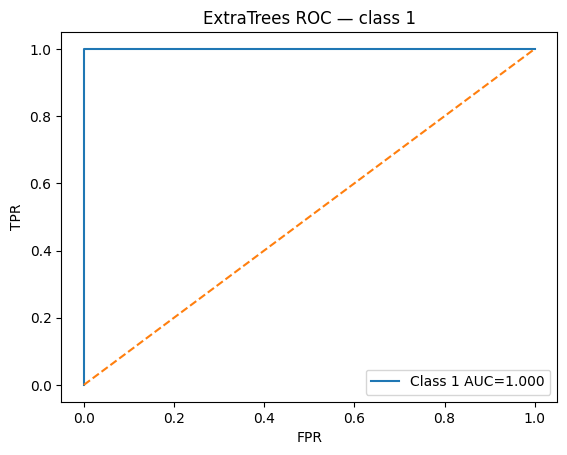

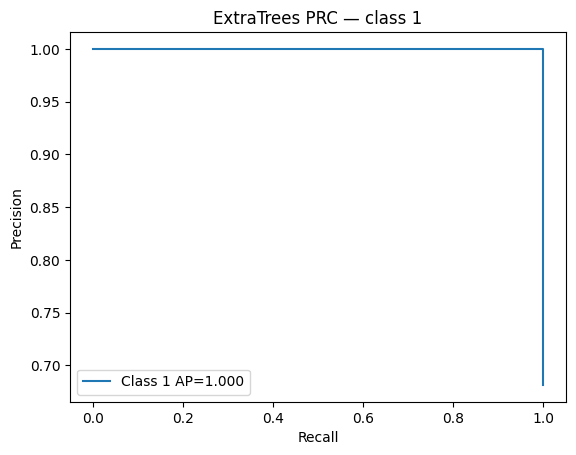

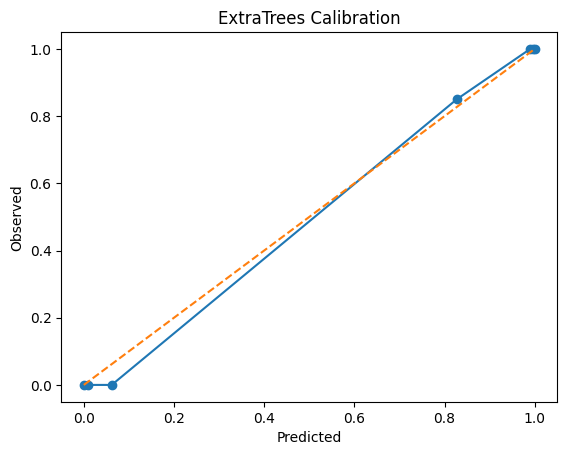

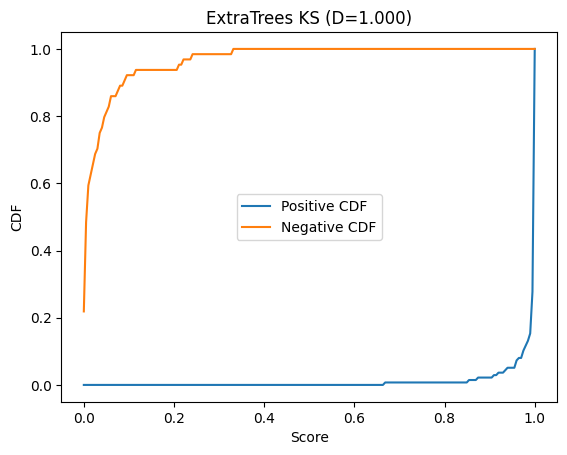

In [34]:

from sklearn.ensemble import ExtraTreesClassifier, ExtraTreesRegressor
from sklearn.pipeline import Pipeline

if IS_CLASSIFICATION:
    et = Pipeline([('prep', preprocess),
                   ('clf', ExtraTreesClassifier(n_estimators=400, random_state=42))])
else:
    et = Pipeline([('prep', preprocess),
                   ('reg', ExtraTreesRegressor(n_estimators=400, random_state=42))])
et.fit(X_train, y_train)
y_pred = et.predict(X_test)
if IS_CLASSIFICATION:
    print_classification_metrics(y_test, y_pred)
    proba = et.predict_proba(X_test) if hasattr(et, 'predict_proba') else None
    if proba is not None:
        scores = proba[:,1] if proba.shape[1]==2 else None
        plot_roc_prc(y_test, proba, title_prefix='ExtraTrees')
        if scores is not None:
            plot_calibration_ks(y_test, scores, title_prefix='ExtraTrees')
else:
    print_regression_metrics(y_test, y_pred)


## 🔹 AdaBoost

Accuracy : 1.0000
Precision: 1.0000
Recall   : 1.0000
F1-score : 1.0000
Kappa    : 1.0000


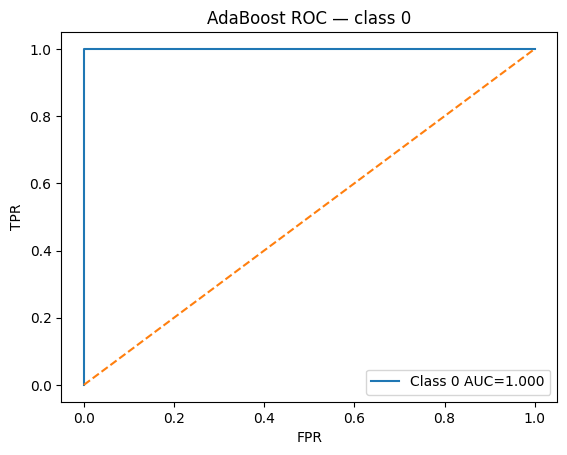

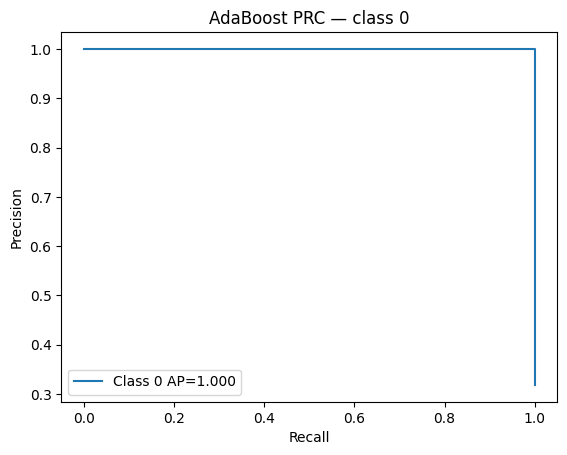

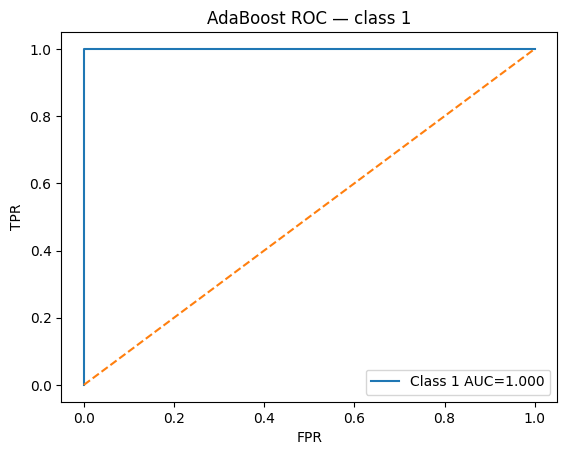

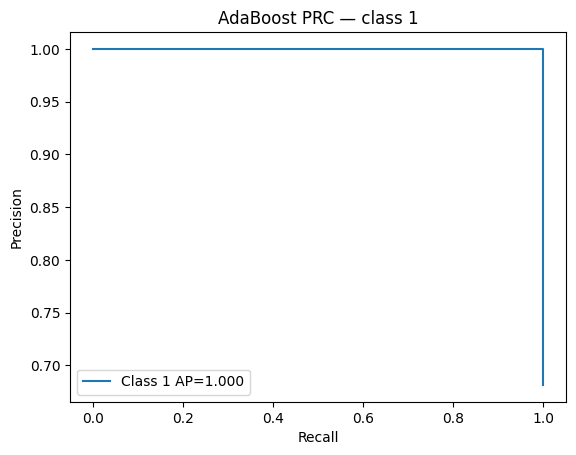

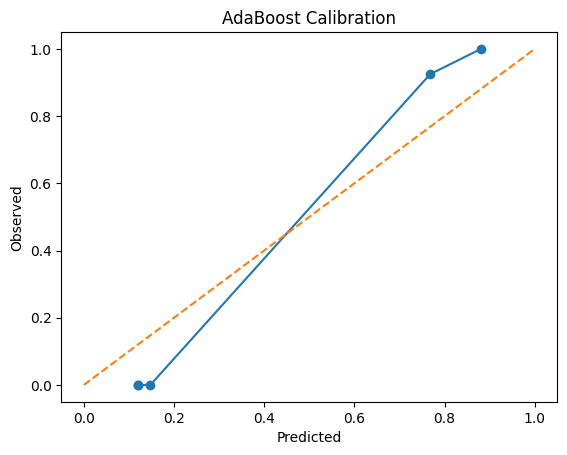

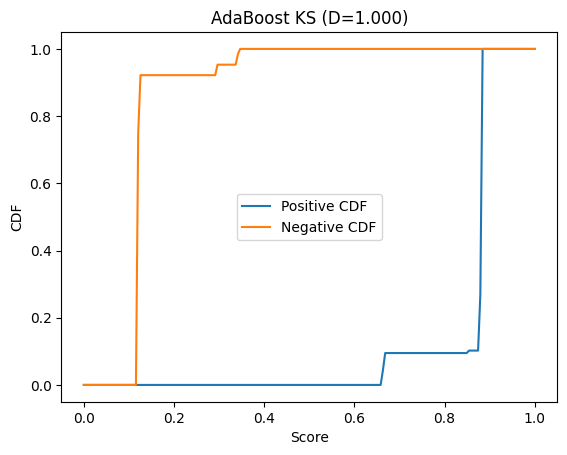

In [35]:

from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor
from sklearn.pipeline import Pipeline

if IS_CLASSIFICATION:
    ada = Pipeline([('prep', preprocess),
                    ('clf', AdaBoostClassifier(n_estimators=400, random_state=42))])
else:
    ada = Pipeline([('prep', preprocess),
                    ('reg', AdaBoostRegressor(n_estimators=400, random_state=42))])
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)
if IS_CLASSIFICATION:
    print_classification_metrics(y_test, y_pred)
    proba = ada.predict_proba(X_test) if hasattr(ada, 'predict_proba') else None
    if proba is not None:
        scores = proba[:,1] if proba.shape[1]==2 else None
        plot_roc_prc(y_test, proba, title_prefix='AdaBoost')
        if scores is not None:
            plot_calibration_ks(y_test, scores, title_prefix='AdaBoost')
else:
    print_regression_metrics(y_test, y_pred)


In [36]:

# 📊 Collect metrics across models
import pandas as pd

metrics_rows = []

def add_cls_row(name, model):
    y_pred = model.predict(X_test)
    row = {
        'model': name,
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred, average=AVERAGE, zero_division=0),
        'recall': recall_score(y_test, y_pred, average=AVERAGE, zero_division=0),
        'f1': f1_score(y_test, y_pred, average=AVERAGE, zero_division=0),
        'kappa': cohen_kappa_score(y_test, y_pred)
    }
    metrics_rows.append(row)

def add_reg_row(name, model):
    y_pred = model.predict(X_test)
    row = {
        'model': name,
        'mse': mean_squared_error(y_test, y_pred),
        'rmse': math.sqrt(mean_squared_error(y_test, y_pred)),
        'mase': mase(y_test, y_pred)
    }
    metrics_rows.append(row)

models_dict = {}
if IS_CLASSIFICATION:
    models_dict = {'logreg': logreg, 'dt': dt, 'rf': rf, 'svm': svm, 'knn': knn,
                   'nb': nb_pipeline, 'gb': gb, 'xgb': xgb, 'lgb': lgb, 'cat': cat,
                   'et': et, 'ada': ada}
    for name, m in models_dict.items():
        add_cls_row(name, m)
else:
    models_dict = {'dt': dt, 'rf': rf, 'svm': svm, 'knn': knn,
                   'gb': gb, 'xgb': xgb, 'lgb': lgb, 'cat': cat, 'et': et, 'ada': ada}
    for name, m in models_dict.items():
        add_reg_row(name, m)

metrics_df = pd.DataFrame(metrics_rows)
display(metrics_df.sort_values(by=metrics_df.columns[1], ascending=False))


,model,accuracy,precision,recall,f1,kappa
0,logreg,1.000000,1.000000,1.000000,1.000000,1.000000
1,dt,1.000000,1.000000,1.000000,1.000000,1.000000
2,rf,1.000000,1.000000,1.000000,1.000000,1.000000
3,svm,1.000000,1.000000,1.000000,1.000000,1.000000
7,xgb,1.000000,1.000000,1.000000,1.000000,1.000000
6,gb,1.000000,1.000000,1.000000,1.000000,1.000000
9,cat,1.000000,1.000000,1.000000,1.000000,1.000000
8,lgb,1.000000,1.000000,1.000000,1.000000,1.000000
10,et,1.000000,1.000000,1.000000,1.000000,1.000000
11,ada,1.000000,1.000000,1.000000,1.000000,1.000000


##  Stacking Ensemble

Stacking — Classification metrics
Accuracy : 1.0000
Precision: 1.0000
Recall   : 1.0000
F1-score : 1.0000
Kappa    : 1.0000


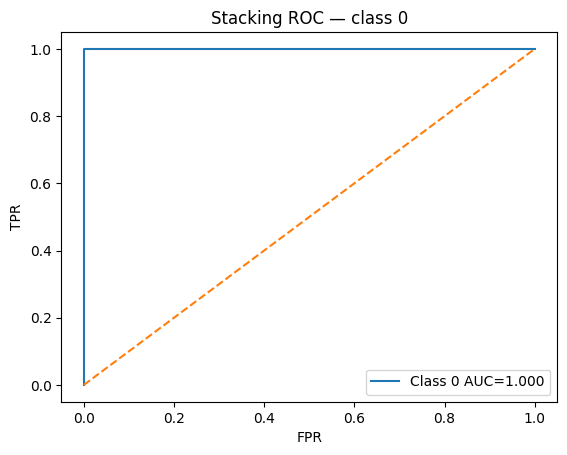

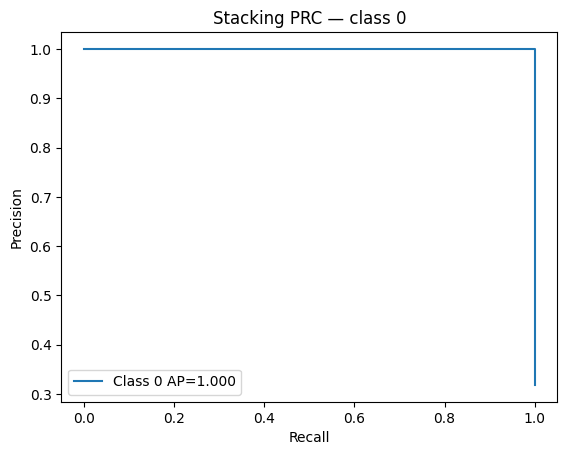

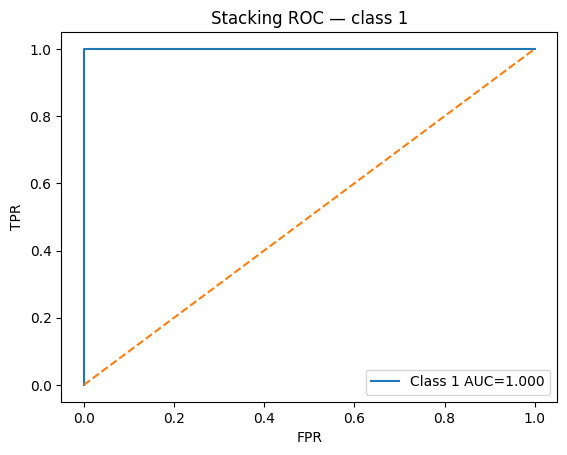

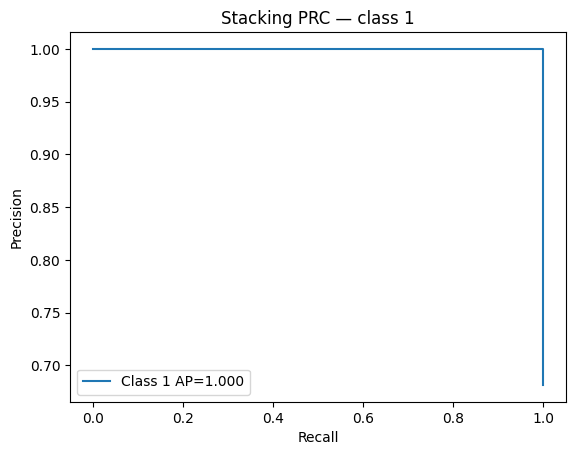

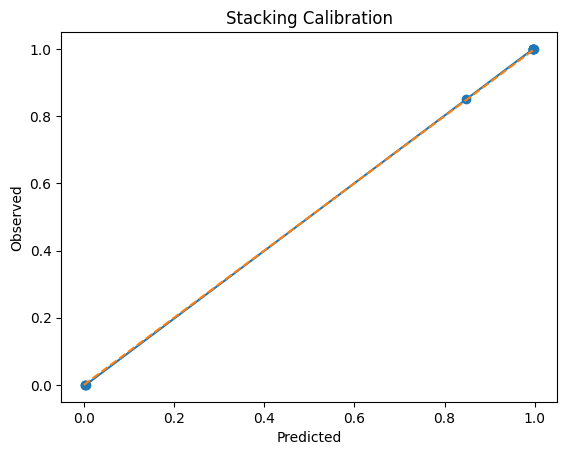

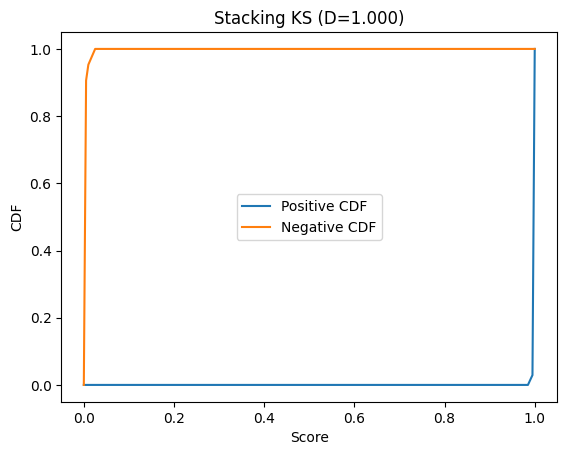

In [39]:

from sklearn.ensemble import StackingClassifier, StackingRegressor
from sklearn.linear_model import LogisticRegression, Ridge

if IS_CLASSIFICATION:
    estimators = [(k, v) for k, v in models_dict.items() if k != 'logreg']  # keep LR as meta
    final_est = LogisticRegression(max_iter=2000)
    stack = StackingClassifier(estimators=estimators, final_estimator=final_est, passthrough=False, stack_method='auto')
else:
    estimators = [(k, v) for k, v in models_dict.items()]
    final_est = Ridge(alpha=1.0)
    stack = StackingRegressor(estimators=estimators, final_estimator=final_est, passthrough=False)

stack.fit(X_train, y_train)

# Evaluate
y_pred = stack.predict(X_test)
if IS_CLASSIFICATION:
    print("Stacking — Classification metrics")
    print_classification_metrics(y_test, y_pred)
    if hasattr(stack, 'predict_proba'):
        proba = stack.predict_proba(X_test)
        plot_roc_prc(y_test, proba, title_prefix='Stacking')
        if proba.shape[1]==2:
            plot_calibration_ks(y_test, proba[:,1], title_prefix='Stacking')
else:
    print("Stacking — Regression metrics")
    print_regression_metrics(y_test, y_pred)


Evaluating Logistic Regression...
Evaluating Decision Tree...
Evaluating Random Forest...
Evaluating SVM...
Evaluating KNN...
Evaluating Naive Bayes...
Evaluating Gradient Boosting...
Evaluating AdaBoost...
Evaluating Extra Trees...
Evaluating XGBoost...
Evaluating LightGBM...
Evaluating CatBoost...
Evaluating Stacking Classifier...


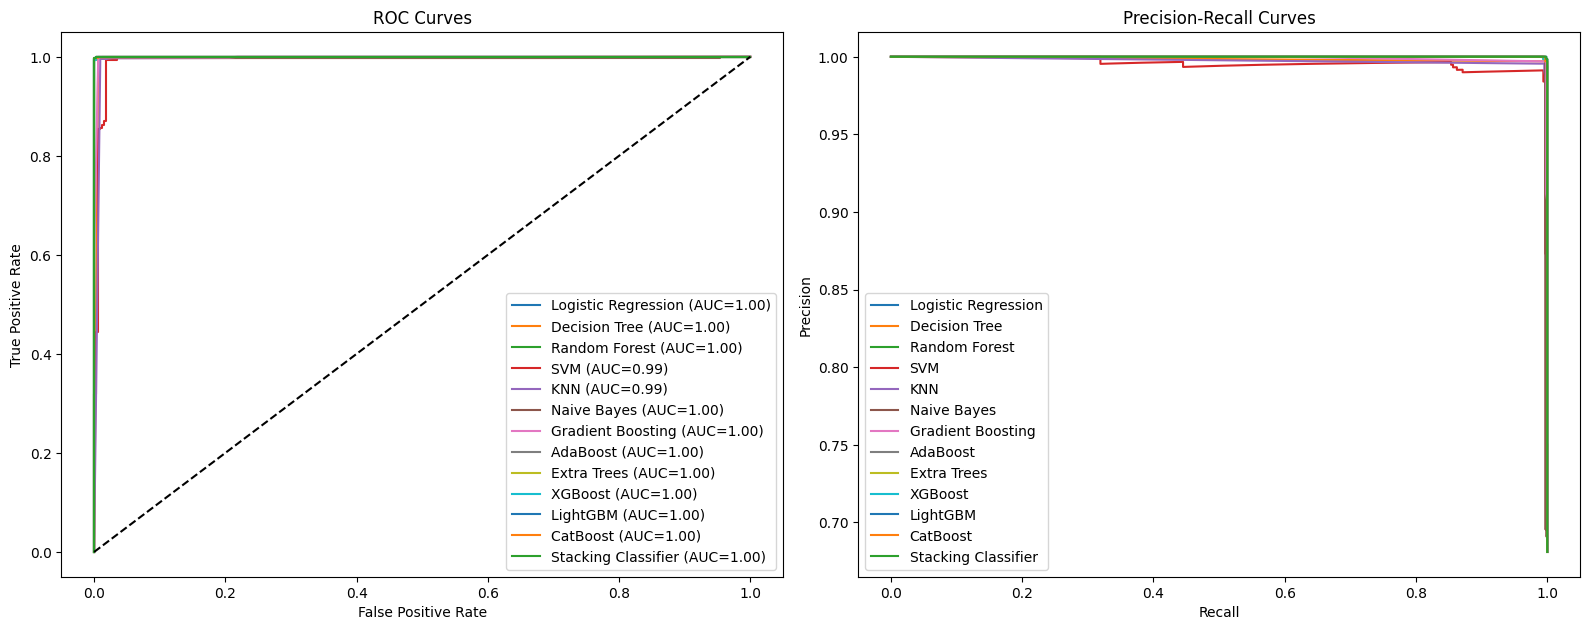

,Accuracy,F1,Precision,Recall,Kappa,MSE,MASE
Logistic Regression,0.999003,0.999003,0.999006,0.999003,0.997707,0.000997,0.004251
Decision Tree,0.997009,0.997008,0.997009,0.997009,0.993111,0.002991,0.012753
Random Forest,0.996012,0.996012,0.996012,0.996012,0.990822,0.003988,0.017004
SVM,0.984048,0.984074,0.984136,0.984048,0.963409,0.015952,0.068017
KNN,0.991027,0.991016,0.991025,0.991027,0.979297,0.008973,0.038260
Naive Bayes,0.997009,0.997013,0.997037,0.997009,0.993133,0.002991,0.012753
Gradient Boosting,0.997009,0.997008,0.997009,0.997009,0.993111,0.002991,0.012753
AdaBoost,0.999003,0.999003,0.999004,0.999003,0.997704,0.000997,0.004251
Extra Trees,0.999003,0.999003,0.999004,0.999003,0.997704,0.000997,0.004251
XGBoost,0.999003,0.999003,0.999004,0.999003,0.997704,0.000997,0.004251


In [41]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import (accuracy_score, f1_score, precision_score, recall_score,
                             cohen_kappa_score, mean_squared_error, roc_curve, auc,
                             precision_recall_curve)
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


def evaluate_model_kfold(model, X, y, n_splits=5):
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    y_true_all, y_pred_all, y_proba_all = [], [], []

    for train_idx, test_idx in skf.split(X, y):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_true_all.extend(y_test)
        y_pred_all.extend(y_pred)

        if hasattr(model, "predict_proba"):
            y_proba_all.extend(model.predict_proba(X_test)[:,1])

    # Convert to np arrays
    y_true_all = np.array(y_true_all)
    y_pred_all = np.array(y_pred_all)
    y_proba_all = np.array(y_proba_all) if len(y_proba_all) > 0 else None

    # Metrics
    acc = accuracy_score(y_true_all, y_pred_all)
    f1 = f1_score(y_true_all, y_pred_all, average="weighted")
    prec = precision_score(y_true_all, y_pred_all, average="weighted")
    rec = recall_score(y_true_all, y_pred_all, average="weighted")
    kappa = cohen_kappa_score(y_true_all, y_pred_all)
    mse = mean_squared_error(y_true_all, y_pred_all)
    mase = np.mean(np.abs(y_true_all - y_pred_all)) / (np.mean(np.abs(np.diff(y_true_all)))+1e-9)

    results = {
        "Accuracy": acc,
        "F1": f1,
        "Precision": prec,
        "Recall": rec,
        "Kappa": kappa,
        "MSE": mse,
        "MASE": mase
    }
    return results, y_true_all, y_pred_all, y_proba_all


# Base Models

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier, StackingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier

base_models = [
    ("Logistic Regression", LogisticRegression(max_iter=2000)),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Random Forest", RandomForestClassifier()),
    ("SVM", SVC(probability=True)),
    ("KNN", KNeighborsClassifier()),
    ("Naive Bayes", GaussianNB()),
    ("Gradient Boosting", GradientBoostingClassifier()),
    ("AdaBoost", AdaBoostClassifier()),
    ("Extra Trees", ExtraTreesClassifier()),
    ("XGBoost", xgb.XGBClassifier(eval_metric="logloss", use_label_encoder=False)),
    ("LightGBM", lgb.LGBMClassifier()),
    ("CatBoost", CatBoostClassifier(verbose=0))
]


estimators = [(name, model) for name, model in base_models if name not in ["SVM", "Naive Bayes"]]
stacking_model = ("Stacking Classifier", StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(max_iter=2000)))

all_models = base_models + [stacking_model]


all_results = {}

plt.figure(figsize=(16, 12))
for i, (name, model) in enumerate(all_models, 1):
    print(f"Evaluating {name}...")
    results, y_true, y_pred, y_proba = evaluate_model_kfold(model, X, y, n_splits=5)
    all_results[name] = results

    # ROC Curve
    if y_proba is not None:
        fpr, tpr, _ = roc_curve(y_true, y_proba)
        roc_auc = auc(fpr, tpr)
        plt.subplot(2, 2, 1)
        plt.plot(fpr, tpr, label=f"{name} (AUC={roc_auc:.2f})")

        # PR Curve
        prec, rec, _ = precision_recall_curve(y_true, y_proba)
        plt.subplot(2, 2, 2)
        plt.plot(rec, prec, label=name)

plt.subplot(2, 2, 1)
plt.plot([0,1],[0,1],'k--')
plt.title("ROC Curves")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()

plt.subplot(2, 2, 2)
plt.title("Precision-Recall Curves")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()

plt.tight_layout()
plt.show()


pd.DataFrame(all_results).T


Evaluating Logistic Regression...
Evaluating Decision Tree...
Evaluating Random Forest...
Evaluating SVM...
Evaluating KNN...
Evaluating Naive Bayes...
Evaluating Gradient Boosting...
Evaluating AdaBoost...
Evaluating Extra Trees...
Evaluating XGBoost...
Evaluating LightGBM...
Evaluating CatBoost...
Evaluating Stacking Classifier...


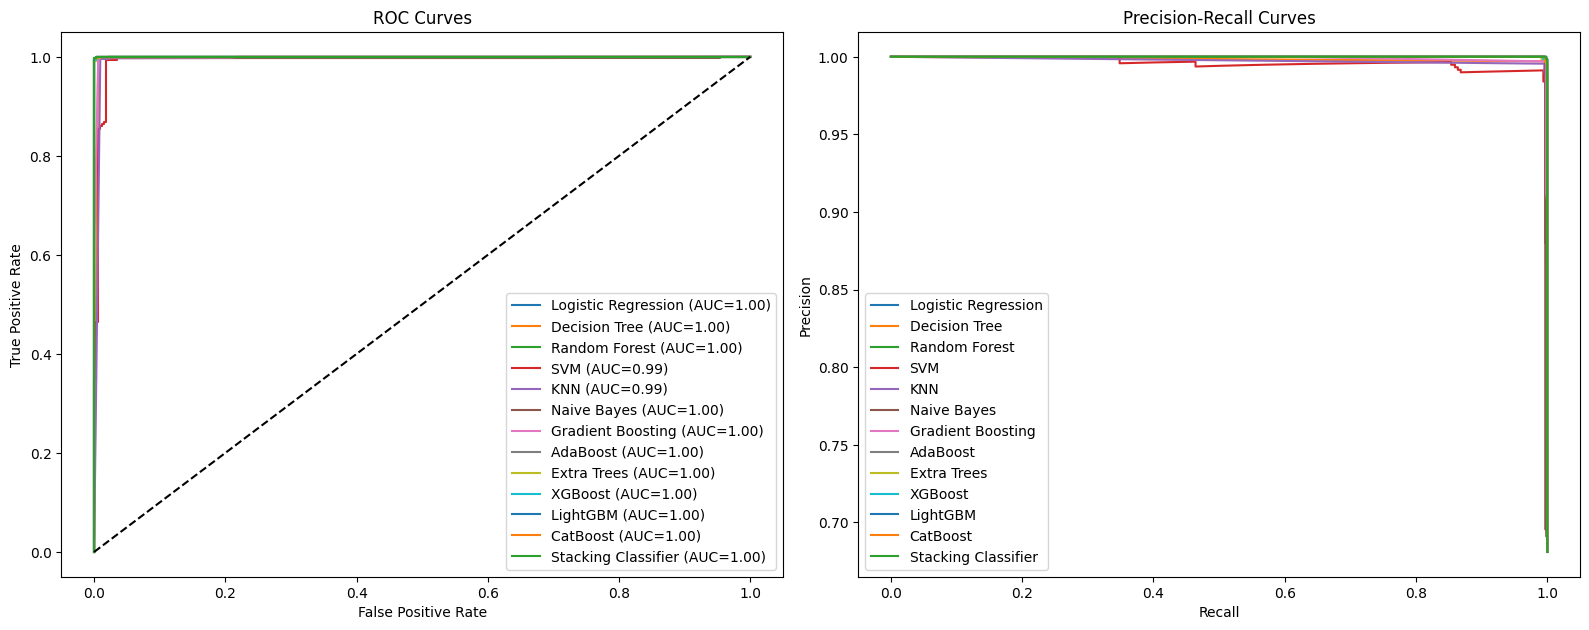

,Accuracy,F1,Precision,Recall,Kappa,MSE,MASE
Logistic Regression,0.999 ± 0.003,0.999 ± 0.003,0.999 ± 0.003,0.999 ± 0.003,0.998 ± 0.006,0.001 ± 0.003,0.004 ± 0.011
Decision Tree,0.997 ± 0.003,0.997 ± 0.003,0.997 ± 0.003,0.997 ± 0.003,0.993 ± 0.008,0.003 ± 0.003,0.012 ± 0.014
Random Forest,0.997 ± 0.003,0.997 ± 0.003,0.997 ± 0.003,0.997 ± 0.003,0.993 ± 0.008,0.003 ± 0.003,0.013 ± 0.015
SVM,0.984 ± 0.015,0.984 ± 0.015,0.984 ± 0.015,0.984 ± 0.015,0.964 ± 0.035,0.016 ± 0.015,0.068 ± 0.063
KNN,0.991 ± 0.008,0.991 ± 0.008,0.991 ± 0.008,0.991 ± 0.008,0.979 ± 0.019,0.009 ± 0.008,0.039 ± 0.033
Naive Bayes,0.997 ± 0.003,0.997 ± 0.003,0.997 ± 0.003,0.997 ± 0.003,0.993 ± 0.008,0.003 ± 0.003,0.013 ± 0.015
Gradient Boosting,0.997 ± 0.003,0.997 ± 0.003,0.997 ± 0.003,0.997 ± 0.003,0.993 ± 0.008,0.003 ± 0.003,0.012 ± 0.014
AdaBoost,0.999 ± 0.003,0.999 ± 0.003,0.999 ± 0.003,0.999 ± 0.003,0.998 ± 0.006,0.001 ± 0.003,0.005 ± 0.013
Extra Trees,0.997 ± 0.006,0.997 ± 0.006,0.997 ± 0.005,0.997 ± 0.006,0.993 ± 0.013,0.003 ± 0.006,0.013 ± 0.025
XGBoost,0.999 ± 0.003,0.999 ± 0.003,0.999 ± 0.003,0.999 ± 0.003,0.998 ± 0.006,0.001 ± 0.003,0.005 ± 0.013


In [42]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import (accuracy_score, f1_score, precision_score, recall_score,
                             cohen_kappa_score, mean_squared_error, roc_curve, auc,
                             precision_recall_curve)
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats


def mean_ci(data, confidence=0.95):
    arr = np.array(data)
    mean = np.mean(arr)
    sem = stats.sem(arr)
    h = sem * stats.t.ppf((1 + confidence) / 2., len(arr)-1)
    return mean, h


def evaluate_model_kfold_ci(model, X, y, n_splits=5, confidence=0.95):
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    metrics = {"Accuracy":[], "F1":[], "Precision":[], "Recall":[], "Kappa":[], "MSE":[], "MASE":[]}
    y_true_all, y_pred_all, y_proba_all = [], [], []

    for train_idx, test_idx in skf.split(X, y):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_true_all.extend(y_test)
        y_pred_all.extend(y_pred)

        if hasattr(model, "predict_proba"):
            y_proba_all.extend(model.predict_proba(X_test)[:,1])

        # Fold metrics
        metrics["Accuracy"].append(accuracy_score(y_test, y_pred))
        metrics["F1"].append(f1_score(y_test, y_pred, average="weighted"))
        metrics["Precision"].append(precision_score(y_test, y_pred, average="weighted"))
        metrics["Recall"].append(recall_score(y_test, y_pred, average="weighted"))
        metrics["Kappa"].append(cohen_kappa_score(y_test, y_pred))
        metrics["MSE"].append(mean_squared_error(y_test, y_pred))
        mase = np.mean(np.abs(y_test - y_pred)) / (np.mean(np.abs(np.diff(y_test)))+1e-9)
        metrics["MASE"].append(mase)

    # Confidence interval results
    results = {}
    for m, vals in metrics.items():
        mean, h = mean_ci(vals, confidence)
        results[m] = f"{mean:.3f} ± {h:.3f}"

    return results, np.array(y_true_all), np.array(y_pred_all), np.array(y_proba_all)


all_results = {}
plt.figure(figsize=(16, 12))

for i, (name, model) in enumerate(all_models, 1):
    print(f"Evaluating {name}...")
    results, y_true, y_pred, y_proba = evaluate_model_kfold_ci(model, X, y, n_splits=5)
    all_results[name] = results

    # ROC curve
    if y_proba is not None and len(np.unique(y_true)) == 2:
        fpr, tpr, _ = roc_curve(y_true, y_proba)
        roc_auc = auc(fpr, tpr)
        plt.subplot(2, 2, 1)
        plt.plot(fpr, tpr, label=f"{name} (AUC={roc_auc:.2f})")

        # PR curve
        prec, rec, _ = precision_recall_curve(y_true, y_proba)
        plt.subplot(2, 2, 2)
        plt.plot(rec, prec, label=name)

plt.subplot(2, 2, 1)
plt.plot([0,1],[0,1],'k--')
plt.title("ROC Curves")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()

plt.subplot(2, 2, 2)
plt.title("Precision-Recall Curves")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()

plt.tight_layout()
plt.show()


metrics_df = pd.DataFrame(all_results).T
display(metrics_df)


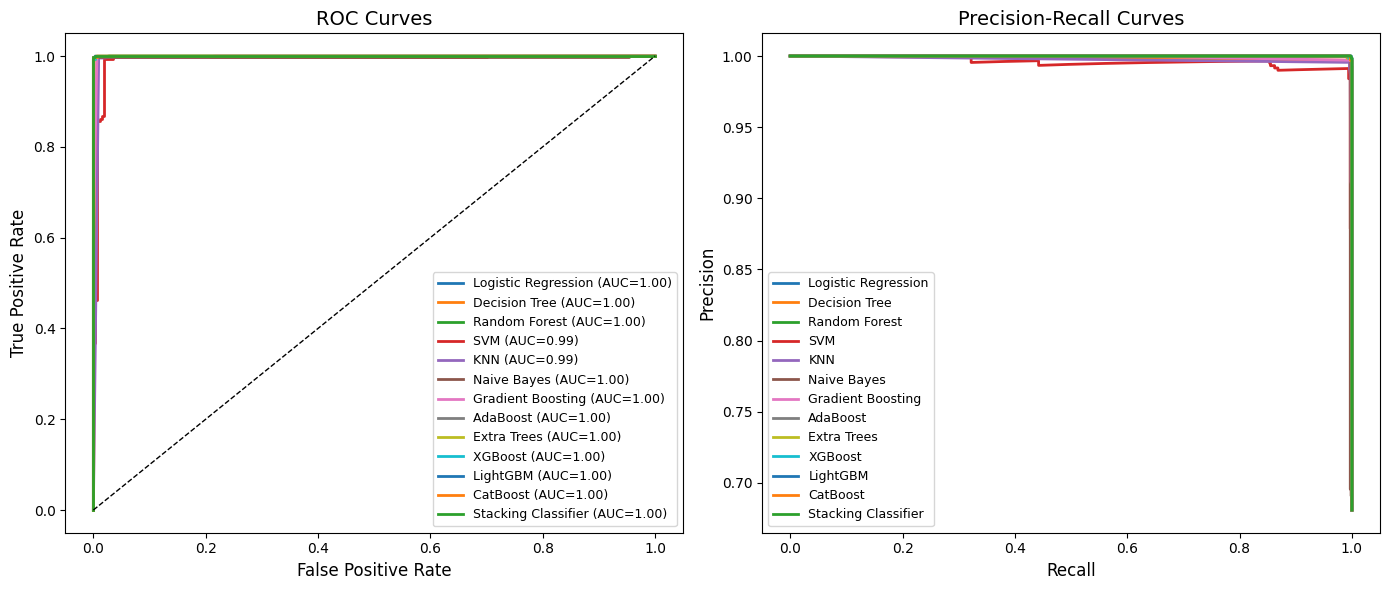

✅ ROC & PRC curves saved as 'roc_pr_curves.png' (300 dpi)


In [43]:

from sklearn.calibration import calibration_curve

plt.figure(figsize=(14, 6))

# ROC
plt.subplot(1, 2, 1)
for name, model in all_models:
    results, y_true, y_pred, y_proba = evaluate_model_kfold_ci(model, X, y, n_splits=5)
    if y_proba is not None and len(np.unique(y_true)) == 2:
        fpr, tpr, _ = roc_curve(y_true, y_proba)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f"{name} (AUC={roc_auc:.2f})")

plt.plot([0, 1], [0, 1], "k--", lw=1)
plt.title("ROC Curves", fontsize=14)
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.legend(fontsize=9, loc="lower right")

# PRC
plt.subplot(1, 2, 2)
for name, model in all_models:
    results, y_true, y_pred, y_proba = evaluate_model_kfold_ci(model, X, y, n_splits=5)
    if y_proba is not None and len(np.unique(y_true)) == 2:
        precision, recall, _ = precision_recall_curve(y_true, y_proba)
        plt.plot(recall, precision, lw=2, label=f"{name}")

plt.title("Precision-Recall Curves", fontsize=14)
plt.xlabel("Recall", fontsize=12)
plt.ylabel("Precision", fontsize=12)
plt.legend(fontsize=9, loc="lower left")

plt.tight_layout()
plt.savefig("roc_pr_curves.png", dpi=300, bbox_inches="tight")
plt.show()

print("✅ ROC & PRC curves saved as 'roc_pr_curves.png' (300 dpi)")
